# Initial Set-Up

In [3]:
from mpl_toolkits.basemap import Basemap as Basemap

In [9]:
import pickle as pkl
import pandas as pd
import matplotlib
import os
import re

import collections
import datetime
import time

# import geopandas as gpd

import numpy as np

import rasterio

from difflib import get_close_matches

from fuzzywuzzy import process
from fuzzywuzzy import fuzz

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


import seaborn as sns

import numpy as np

import scipy

from matplotlib.colors import LogNorm

from sklearn import preprocessing

import dask.dataframe as dd

import xclim


In [10]:
import intake
import intake_esm
import xarray as xr 
# import proplot as plot 
import matplotlib.pyplot as plt

In [11]:
hq = pd.read_csv("../../data/companyData/justHQs.csv") 


min_lat = hq.latitude.min()
max_lat = hq.latitude.max()

min_lon = hq.longitude.min()
max_lon = hq.longitude.max()

In [12]:
# necessary url
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
# open the catalog
dataframe = intake.open_esm_datastore(url)

In [13]:
dataframe.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year', 'version'],
      dtype='object')

In [ ]:
start = time.time()
# experID = # 'ssp585'
# varID   = 'pr'
experiments = ['ssp585'] # 'ssp126',

variables   = ['tasmax']# ,'']

i = 1

for experID in experiments:
    for varID in variables:
        for i in range(1,51):
            memID   = 'r' + str(i) +'i1p1f1'

            print(experID,varID,memID)
            models = dataframe.search(experiment_id =[experID],
                                      table_id      ='day',
                                      variable_id   =varID,
                                      institution_id='MIROC',
                                      member_id     =memID)


            datasets = models.to_dataset_dict(aggregate = False)
            x = list(datasets.keys())
            # print(x)
            dset = datasets[x[0]]
            dset.attrs['intake_esm_varname'] = 'none'

            dset.coords['lon'] = (dset.coords['lon'] + 180) % 360 - 180
            dset = dset.sortby(dset.lon)


            dset = dset.sel(time=slice('1981-01-01','2039-12-31'),
                           lat=slice(min_lat,max_lat), 
                           lon=slice(min_lon,max_lon))



            dirName  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + experID + '/' + varID + '/'

            filename = varID + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'
            print(dirName + filename)

            dset.to_netcdf(dirName + filename)

            print(time.time() - start)

models.df.experiment_id

In [99]:
memID = 'r4(.*?)i1p1f1'
print(memID)
models = dataframe.search(experiment_id=[experID],
                          table_id='day',
                          variable_id=['pr','tasmax'],
                          institution_id='MIROC',
                          member_id=memID)


datasets = models.to_dataset_dict(aggregate = False)
''' x = list(datasets.keys())
# print(x)
dset = datasets[x[0]]
dset.attrs['intake_esm_varname'] = 'none'

dset.coords['lon'] = (dset.coords['lon'] + 180) % 360 - 180
dset = dset.sortby(dset.lon)


dset = dset.sel(time=slice('2015-01-01','2039-12-31'),
               lat=slice(min_lat,max_lat), 
               lon=slice(min_lon,max_lon))

print(dset)

dirName  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + experID + '/' + varID + '/'

filename = 'both' + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'
# varID + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'
print(dirName + filename)

dset.to_netcdf(dirName + filename)
'''

r4(.*?)i1p1f1

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


" x = list(datasets.keys())\n# print(x)\ndset = datasets[x[0]]\ndset.attrs['intake_esm_varname'] = 'none'\n\ndset.coords['lon'] = (dset.coords['lon'] + 180) % 360 - 180\ndset = dset.sortby(dset.lon)\n\n\ndset = dset.sel(time=slice('2015-01-01','2039-12-31'),\n               lat=slice(min_lat,max_lat), \n               lon=slice(min_lon,max_lon))\n\nprint(dset)\n\ndirName  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + experID + '/' + varID + '/'\n\nfilename = 'both' + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'\n# varID + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'\nprint(dirName + filename)\n\ndset.to_netcdf(dirName + filename)\n"

In [10]:
np.var([5,9])

4.0

In [ ]:
models = dataframe.search(experiment_id='historical',
                              table_id='Amon',
                              variable_id='tas',
                              institution_id='NCAR',
                              member_id='r11i1p1f1')

In [3]:
'''baselineName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/mirocHQs_198199.csv'
baseline = pd.read_csv(baselineName)'''

"baselineName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/mirocHQs_198199.csv'\nbaseline = pd.read_csv(baselineName)"

# Weather Data
## *this is how we process the cmip6Data


In [7]:
import netCDF4 as nc
import xarray as xr

In [8]:
# https://kpegion.github.io/Pangeo-at-AOES/examples/advanced-analysis.html

In [9]:
def getAllData(weather,scenario):

    start = time.time()

    file_hist  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/' + weather + '/' + weather + '_day_MIROC6_historical_r*i1p1f1_gn.nc'
    file_proj  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + scenario + '/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn.nc'
    print(file_hist, file_proj)
    data_hist  = xr.open_mfdataset(file_hist, concat_dim=['ensemble'], combine='nested', decode_times=True)
    data_proj  = xr.open_mfdataset(file_proj, concat_dim=['ensemble'], combine='nested', decode_times=True)

    data = xr.combine_by_coords([data_hist, data_proj])

    
    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    data = data.sortby(data.lon)

    data = data.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('1981-01-01','2039-12-31'))

    data['time'] = pd.to_datetime(data.time.values.astype(str))
    
    print("starting to load")
    start = time.time()
    # data = data.compute(workers = 100)

    time.time() - start

    # , ,combine = 'by_coords')   #  nc.Dataset(file)

    print("ending the load: ", time.time() - start)

    return(data)

In [10]:
def getFutureData(weather,scenario):

    start = time.time()
    
    file = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + scenario + '/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn.nc'
    data = xr.open_mfdataset(file,concat_dim=['ensemble'],combine='nested',decode_times=True)
    
    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    data = data.sortby(data.lon)

    data = data.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2019-01-01','2039-12-31'))

    data['time'] = pd.to_datetime(data.time.values.astype(str))
    
    print("starting to load")
    start = time.time()
    # data = data.compute(workers = 100)

    time.time() - start

    # , ,combine = 'by_coords')   #  nc.Dataset(file)

    print("ending the load: ", time.time() - start)

    return(data)

In [11]:
def getHistData(weather):

    start = time.time()

    
    file = '../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/' + weather + '/' + weather + '_day_MIROC6_historical_r*i1p1f1_gn.nc'
    data = xr.open_mfdataset(file,concat_dim=['ensemble'],combine='nested',decode_times=True)


    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    data = data.sortby(data.lon)

    data = data.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('1981-01-01','1999-12-31'))

    data['time'] = pd.to_datetime(data.time.values.astype(str))
    
    print("starting to load")
    start = time.time()
    data = data.compute(workers = 100)

    time.time() - start

    # , ,combine = 'by_coords')   #  nc.Dataset(file)

    print("ending the load: ", time.time() - start)

    return(data)

In [15]:
quarterlyStatsByZip = pd.read_csv("../../data/companyData/quarterlyStatsByZip_allZips_8199.csv").\
    drop(columns = {'Unnamed: 0'}).rename(columns = {'ZIP': 'zipcode'}).drop_duplicates()
quarterlyStatsByZip.quarterly_avg_temp.mean()

18.089050566283483

In [ ]:
prAll_585 = getAllData('pr','ssp585').compute(workers = 100)
prAll_585

tasmaxAll_585 = getAllData('tasmax','ssp585').compute(workers = 100)
tasmaxAll_585

prAll_126 = getAllData('pr','ssp126').compute(workers = 100)
prAll_126

tasmaxAll_126 = getAllData('tasmax','ssp126').compute(workers = 100)
tasmaxAll_126


../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/pr/pr_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07
../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/tasmax/tasmax_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  0.0
../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp126/pr/pr_day_MIROC6_ssp126_r*i1p1f1_gn.nc
starting to load
ending the load:  1.1920928955078125e-06
../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp126/tasmax/tasmax_d

In [ ]:
def findClosest_temp(row):
    ################
    # pr scenarios
    allDays = tempEnsAvg.sel(lat=row.lat, lon=row.lon, method = 'nearest').tasmax.values
    
    return(allDays)

def findClosest_pr(row):
    ################
    # pr scenarios
    allDays = prEnsAvg.sel(lat=row.lat, lon=row.lon, method = 'nearest').pr.values
    
    return(allDays)



In [16]:
locData_withFracs

NameError: name 'locData_withFracs' is not defined

In [24]:
locData_withFracs.head()

archive_version_year parent_number  latitude  longitude  zipcode  \
0                2003.0         23077  40.44099  -80.00218  15222.0   
1                2003.0         23077  40.47235  -80.06152  15136.0   
2                2003.0         76547  26.55504  -81.88423  33907.0   
3                2003.0         76547  32.83435  -96.89570  75062.0   
4                2003.0         76547  32.90299 -117.11389  92131.0   

   locationFracOfEmployees  
0                 0.147059  
1                 0.735294  
2                 0.121951  
3                 0.104530  
4                 0.104530

In [26]:
locData_withFracs[['parent_number','latitude','longitude']].drop_duplicates()

parent_number  latitude  longitude
0               23077  40.44099  -80.00218
1               23077  40.47235  -80.06152
2               76547  26.55504  -81.88423
3               76547  32.83435  -96.89570
4               76547  32.90299 -117.11389
...               ...       ...        ...
1557369     995461522  40.39754  -74.64981
1557370     995472636  36.81776  -76.06589
1557401     998603237  40.17100  -74.05222
1557402     998608293  37.53327 -121.96795
1557404     998622526  27.88437  -82.73021

[646288 rows x 3 columns]

In [17]:
locData_withFracs = pd.read_csv('../../data/companyData/fractionEmployees_byEstablishment.csv')
'''[['zipcode','latitude','longitude']].drop_duplicates().rename(columns = {'lon': 'longitude',
                                                                            'lat': 'latitude'})'''

locData = locData_withFracs[['zipcode','latitude','longitude']].drop_duplicates().\
    rename(columns = {'lon': 'longitude', 'lat': 'latitude'})


locData['zipcode'] = locData['zipcode'].astype('int64')

locData.rename(columns = {'latitude': 'lat',
                         'longitude': 'lon'}, 
              inplace = True)


locDataByZips = locData.groupby('zipcode').mean().reset_index()

# item = findClosest(hqTest.iloc[0,:],prQ4Avg)

## uncertainty plots

In [292]:
tempModelAvg_585 = tasmaxAll_585.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2039-12-31')).mean(dim = ['lat','lon'])
tempModelAvg_585['tasmax'] = tempModelAvg_585['tasmax'] - 273

tempModelAvg_126 = tasmaxAll_126.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2039-12-31')).mean(dim = ['lat','lon'])
tempModelAvg_126['tasmax'] = tempModelAvg_126['tasmax'] - 273



prModelAvg_585 = prAll_585.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2039-12-31')).mean(dim = ['lat','lon'])
prModelAvg_585['pr'] = prModelAvg_585['pr']

prModelAvg_126 = prAll_126.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2039-12-31')).mean(dim = ['lat','lon'])
prModelAvg_126['tasmax'] = prModelAvg_126['pr']


In [175]:
def getPreds(modelData,weatherVar):
    modelRolling = pd.Series(modelData[weatherVar].values[0]).rolling(365).mean()[366:]

    xVals = range(0, modelRolling.shape[0])

    poly  = np.polyfit(x = xVals, y = np.array(modelRolling), deg = 4)
    poly_noIntercept = poly.copy()
    poly_noIntercept[2] = 0


    preds             = np.polyval(poly,xVals)
    preds_noIntercept = np.polyval(poly_noIntercept,xVals)
    resids            = modelRolling - preds
    
    
    for i in range(1,50):
        modelRolling = pd.Series(modelData[weatherVar].values[i]).rolling(365).mean()[366:]
        
        poly  = np.polyfit(x = xVals, y = np.array(modelRolling), deg = 4)
        poly_noIntercept = poly.copy()
        poly_noIntercept[4] = 0

        preds_temp             = np.polyval(poly,xVals)
        preds_noIntercept_temp = np.polyval(poly_noIntercept,xVals)
        resids_temp            = modelRolling - preds_temp


        preds             = np.vstack((preds,preds_temp))
        preds_noIntercept = np.vstack((preds_noIntercept,preds_temp))
        resids            = np.vstack((resids,resids_temp))
    return(resids, preds, preds_noIntercept)
    # rint(preds)

In [293]:
resids_tasmax585, preds_tasmax585, preds_noIntercept_tasmax585 = getPreds(tempModelAvg_585,'tasmax')
resids_tasmax126, preds_tasmax126, preds_noIntercept_tasmax126 = getPreds(tempModelAvg_126,'tasmax')

resids_pr585, preds_pr585, preds_noIntercept_pr585 = getPreds(prModelAvg_585,'pr')
resids_pr126, preds_pr126, preds_noIntercept_pr126 = getPreds(prModelAvg_126,'pr')

In [132]:
resids_tasmax126.mean()

-1.8103984586298652e-14

###########################
# get the iv

In [294]:
###########################
# get the iv

# concatenate all residuals. find residuals by model and then take the mean
allResids_tasmax = pd.DataFrame(np.concatenate((resids_tasmax126, resids_tasmax585), axis = 1))
internalVariability_tasmax = np.mean(pd.DataFrame(resids_tasmax126).apply(np.var,axis = 1))

internalVariability_tasmax


# concatenate all residuals. find residuals by model and then take the mean
allResids_pr = pd.DataFrame(np.concatenate((resids_pr126, resids_pr585), axis = 1))
internalVariability_pr = np.mean(pd.DataFrame(resids_pr126).apply(np.var,axis = 1))

internalVariability_pr

1.919593313023576e-12

<AxesSubplot:>

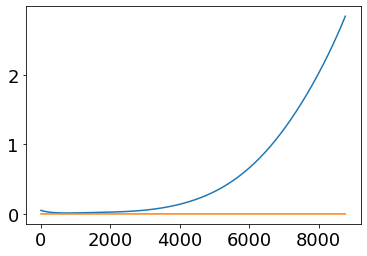

In [295]:
###########################
# now the model uncertainty
M_t_tasmax = .5*pd.DataFrame(preds_noIntercept_tasmax585).apply(np.var,axis = 0) + \
    .5*pd.DataFrame(preds_noIntercept_tasmax126).apply(np.var,axis = 0)
M_t_tasmax.plot()


M_t_pr = .5*pd.DataFrame(preds_noIntercept_pr585).apply(np.var,axis = 0) + \
    .5*pd.DataFrame(preds_noIntercept_pr126).apply(np.var,axis = 0)
M_t_pr.plot()


In [306]:
M_t_pr

0       2.943931e-12
1       2.935425e-12
2       2.926940e-12
3       2.918476e-12
4       2.910034e-12
            ...     
8760    3.441616e-10
8761    3.443080e-10
8762    3.444545e-10
8763    3.446010e-10
8764    3.447476e-10
Length: 8765, dtype: float64

In [296]:
###########################
# now the scenario uncertainty
S_t_tasmax = pd.DataFrame([preds_noIntercept_tasmax585.mean(axis = 0), \
                    preds_noIntercept_tasmax126.mean(axis = 0)]).apply(np.var,axis = 0)

S_t_tasmax


S_t_pr = pd.DataFrame([preds_noIntercept_pr585.mean(axis = 0), \
                    preds_noIntercept_pr126.mean(axis = 0)]).apply(np.var,axis = 0)

S_t_pr

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8760    0.0
8761    0.0
8762    0.0
8763    0.0
8764    0.0
Length: 8765, dtype: float64

In [287]:
x_tasmax = pd.DataFrame({'Scenario': S_t[366:], 'Model': M_t[366:], 'InternalVariability': internalVariability})
x_tasmax['total']               = x_tasmax.Scenario + x_tasmax.Model + x_tasmax.InternalVariability
x_tasmax['Scenario']            = x_tasmax.Scenario/x.total
x_tasmax['Model']               = x_tasmax.Model/x.total
x_tasmax['InternalVariability'] = x_tasmax.InternalVariability/x.total

x_tasmax['InternalVariability_frac'] = 1 - x_tasmax.InternalVariability

x_tasmax['date'] = list(pd.date_range(start="2017-01-01",end="2039-12-30"))

Text(0.5, 1.0, 'Sources of Uncertainty, Temperature (MIROC6 Ensemble)')

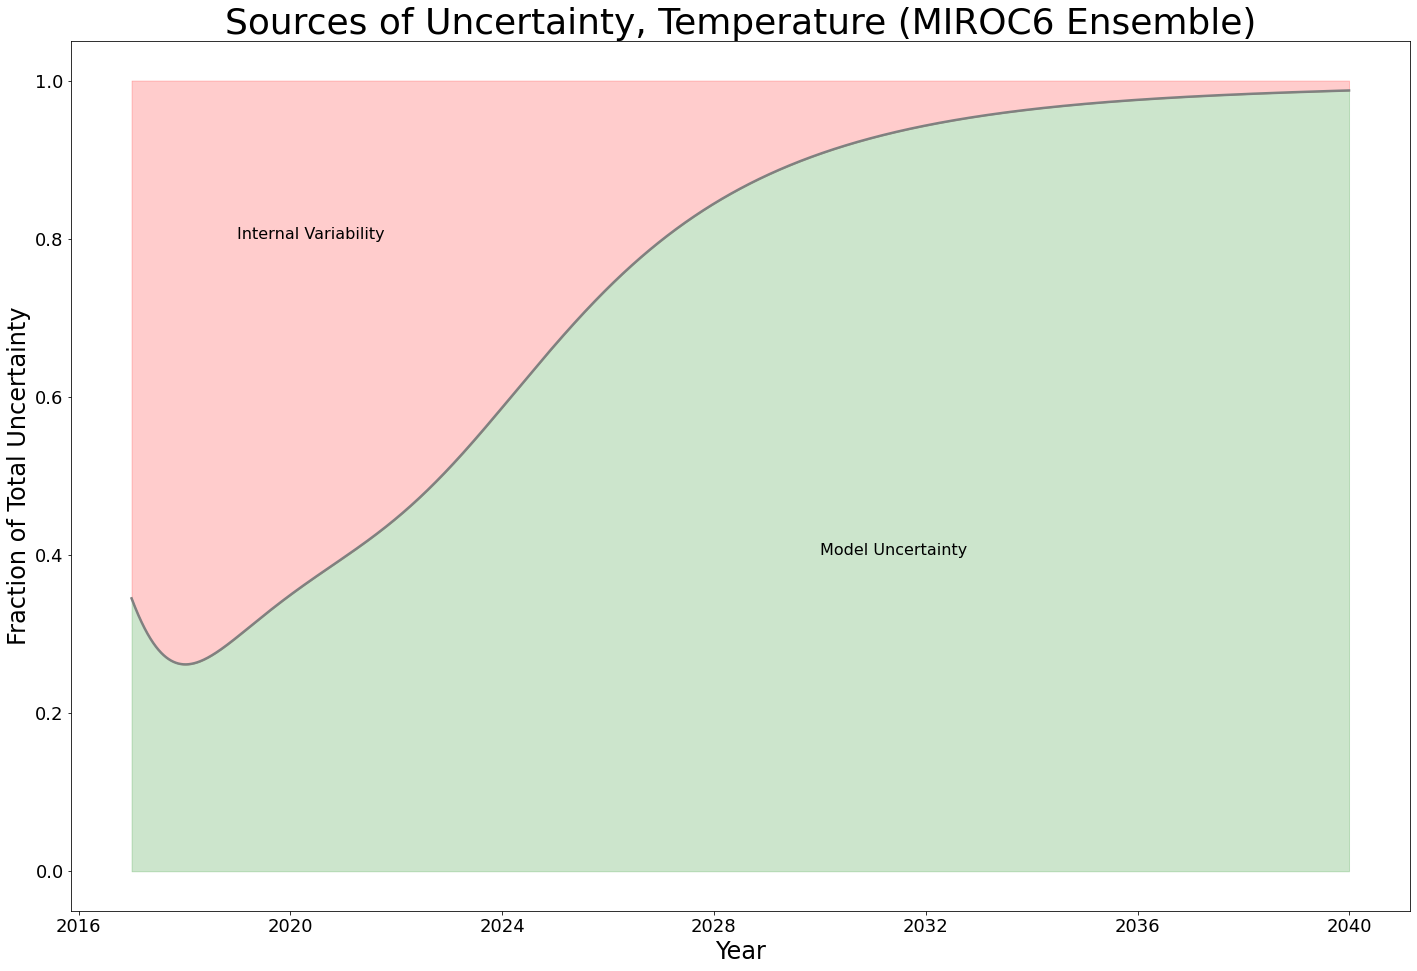

In [289]:
plt.figure(figsize = (24, 16))


times = x_tasmax.date.values

plt.plot(times, x_tasmax['InternalVariability_frac'], linewidth = 2.5, color = 'grey')


plt.fill_between(times, x_tasmax['InternalVariability_frac'], 1, color='red',   alpha=.2)
plt.fill_between(times, x_tasmax['InternalVariability_frac'], 0, color='green',  alpha=.2)


plt.xlabel('Year', fontsize = 24)
plt.ylabel('Fraction of Total Uncertainty', fontsize = 24)
plt.rcParams['font.size'] = 18


plt.text(datetime.datetime.strptime('2019-01-01','%Y-%m-%d'), .8, 'Internal Variability', fontsize=16)
plt.text(datetime.datetime.strptime('2030-01-01','%Y-%m-%d'), .4, 'Model Uncertainty',    fontsize=16)


plt.title("Sources of Uncertainty, Temperature (MIROC6 Ensemble)", 
          fontsize = 36)

In [313]:
x_pr

Scenario       Model  InternalVariability       total  \
366        0.0   17.555841            34.972397    2.883213   
367        0.0   17.514509            34.998319    2.880232   
368        0.0   17.473244            35.024166    2.877261   
369        0.0   17.432044            35.049939    2.874301   
370        0.0   17.390910            35.075637    2.871350   
...        ...         ...                  ...         ...   
8760       0.0  119.825345             0.668337  346.081185   
8761       0.0  119.824919             0.668050  346.227620   
8762       0.0  119.824487             0.667764  346.374101   
8763       0.0  119.824047             0.667478  346.520628   
8764       0.0  119.823601             0.667191  346.667202   

      InternalVariability_frac       date  
366                 -33.972397 2017-01-01  
367                 -33.998319 2017-01-02  
368                 -34.024166 2017-01-03  
369                 -34.049939 2017-01-04  
370                 -34.075637 2017-01-05  
...                        ...        ...  
8760                  0.331663 2039-12-26  
8761                  0.331950 2039-12-27  
8762                  0.332236 2039-12-28  
8763                  0.332522 2039-12-29  
8764                  0.332809 2039-12-30  

[8399 rows x 6 columns]

In [324]:
x_pr = pd.DataFrame({'Scenario': S_t_pr[366:], 'Model': M_t_pr[366:], 'InternalVariability': internalVariability_pr})
x_pr = x_pr*1e10

x_pr['total']               = x_pr.Scenario + x_pr.Model + x_pr.InternalVariability
x_pr['Scenario']            = x_pr.Scenario/x.total
x_pr['Model']               = x_pr.Model/x.total
x_pr['InternalVariability'] = x_pr.InternalVariability/x.total

x_pr['InternalVariability_frac'] = 1 - x_pr.InternalVariability

x_pr['date'] = list(pd.date_range(start="2017-01-01",end="2039-12-30"))


x_pr.head()


Scenario     Model  InternalVariability     total  \
366       0.0  0.175558             0.349724  0.028832   
367       0.0  0.175145             0.349983  0.028802   
368       0.0  0.174732             0.350242  0.028773   
369       0.0  0.174320             0.350499  0.028743   
370       0.0  0.173909             0.350756  0.028714   

     InternalVariability_frac       date  
366                  0.650276 2017-01-01  
367                  0.650017 2017-01-02  
368                  0.649758 2017-01-03  
369                  0.649501 2017-01-04  
370                  0.649244 2017-01-05

Text(0.5, 1.0, 'Sources of Uncertainty, Precipitation (MIROC6 Ensemble)')

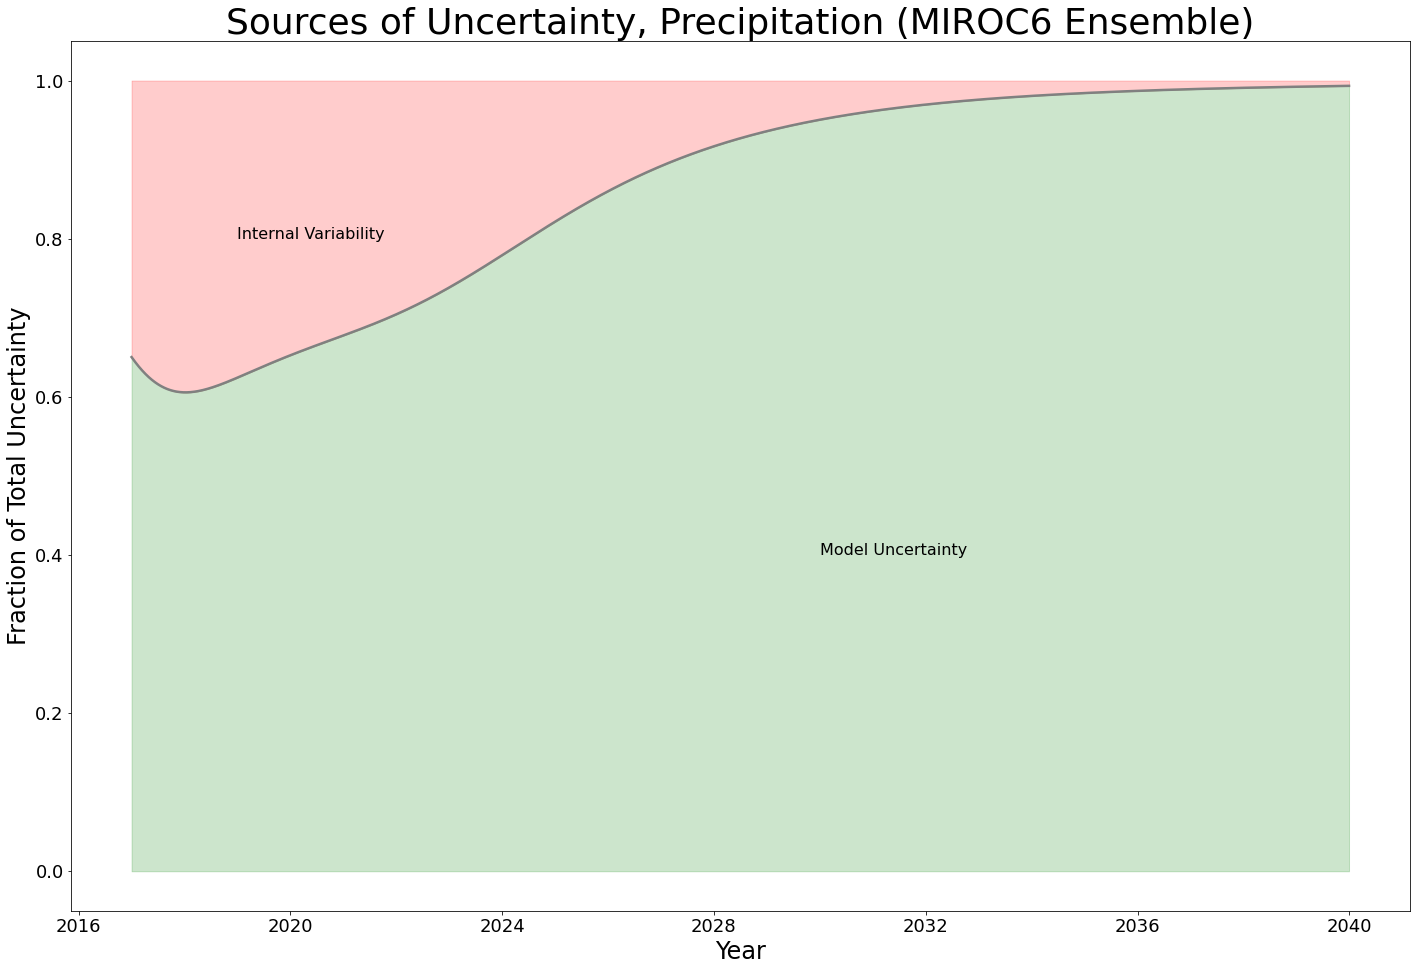

In [325]:
plt.figure(figsize = (24, 16))


times = x_pr.date.values

plt.plot(times, x_pr['InternalVariability_frac'], linewidth = 2.5, color = 'grey')


plt.fill_between(times, x_pr['InternalVariability_frac'], 1, color='red',   alpha=.2)
plt.fill_between(times, x_pr['InternalVariability_frac'], 0, color='green',  alpha=.2)


plt.xlabel('Year', fontsize = 24)
plt.ylabel('Fraction of Total Uncertainty', fontsize = 24)
plt.rcParams['font.size'] = 18


plt.text(datetime.datetime.strptime('2019-01-01','%Y-%m-%d'), .8, 'Internal Variability', fontsize=16)
plt.text(datetime.datetime.strptime('2030-01-01','%Y-%m-%d'), .4, 'Model Uncertainty',    fontsize=16)


plt.title("Sources of Uncertainty, Precipitation (MIROC6 Ensemble)", 
          fontsize = 36)

### Make the correlation maps
now get the prism data as well

In [51]:
tempEnsAvg     = tasmaxAll_585.mean(dim = ['ensemble']).sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2019-12-31'))
tempEnsAvg['tasmax'] = tempEnsAvg['tasmax'] - 273


In [42]:
prEnsAvg     = prAll_585.mean(dim = ['ensemble']).sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2019-12-31'))

In [82]:
start = time.time()

allQuarters_pr        = locDataByZips.apply(findClosest_pr, axis=1)

print(time.time() - start)

prPreds = locDataByZips.copy()

prPreds[list(pd.date_range(start="2015-01-01",end="2019-12-31").\
                   strftime('%Y%m%d'))] = pd.DataFrame(allQuarters_pr.tolist(), index=allQuarters_pr.index)


prPred_toMerge = pd.melt(prPreds, id_vars = ["zipcode","lat","lon"], 
        var_name   = 'date',
        value_name = 'predPr',
        value_vars =list(pd.date_range(start="2015-01-01",end="2019-12-31").strftime('%Y%m%d')))
prPred_toMerge['date'] = prPred_toMerge.date.astype('int64')


16.90057110786438


In [83]:
start = time.time()

allQuarters_temp        = locDataByZips.apply(findClosest_temp, axis=1)

print(time.time() - start)

tempPreds = locDataByZips.copy()

tempPreds[list(pd.date_range(start="2015-01-01",end="2019-12-31").\
                   strftime('%Y%m%d'))] = pd.DataFrame(allQuarters_temp.tolist(), index=allQuarters_temp.index)


tempPred_toMerge = pd.melt(tempPreds, id_vars = ["zipcode","lat","lon"], 
        var_name   = 'date',
        value_name = 'predTemp',
        value_vars =list(pd.date_range(start="2015-01-01",end="2019-12-31").strftime('%Y%m%d')))
tempPred_toMerge['date'] = tempPred_toMerge.date.astype('int64')


17.40021300315857


In [57]:
def getData(weatherType,yearRange1,yearRange2):

    if weatherType == "Tmax":
        weatherVar = "temperature"
    else: 
        weatherVar = "precipitation"
    
    year = yearRange1
    filename = "../../../../../../../Volumes/backup2/dissData/prism/zipcode" + weatherType + str(year) + ".csv"
    data = dd.read_csv(filename, assume_missing=True)[['ZIP','date',weatherVar]]
    data['ZIP'] = data.ZIP.astype('int64')

    
   
    years = range(yearRange1 + 1,yearRange2 + 1)
    for year in years:
        filename = "../../../../../../../Volumes/backup2/dissData/prism/zipcode" + weatherType + str(year) + ".csv"
        tempData = dd.read_csv(filename, assume_missing=True)[['ZIP','date',weatherVar]]
        tempData['ZIP'] = tempData.ZIP.astype('int64')

        # tempData = tempData[tempData.ZIP.isin(relevantZips)]
        # tempData = tempData[~(tempData[weatherVar].isna().compute())]
        data = data.append(tempData)

    data = data[~(data[weatherVar].isna())] # .compute()
    
    return(data)

In [58]:
tempData   = getData("Tmax", 2015, 2019)
temp       = tempData.compute(workers = 100)

precipData = getData("Precip", 2015, 2019)
precip     = precipData.compute(workers = 100)


In [63]:
precip['date'] = precip.date.astype('int64')
temp['date']   = temp.date.astype('int64')

In [85]:
allWeather = precip.merge(temp)
allWeather.rename(columns = {'ZIP': 'zipcode'}, inplace = True)
allWeather = allWeather.merge(prPred_toMerge, how = 'left').merge(tempPred_toMerge, how = 'left')

In [88]:
allWeather.head()

zipcode      date  precipitation  temperature        lat        lon  \
0     1001  20150101            0.0       -0.450  42.060642 -72.635331   
1     1002  20150101            0.0       -2.794  42.369334 -72.514122   
2     1003  20150101            0.0       -1.265  42.389488 -72.525643   
3     1005  20150101            0.0       -3.425  42.410920 -72.108630   
4     1007  20150101            0.0       -1.442  42.261586 -72.348087   

     predPr  predTemp  
0  0.000027  1.171936  
1  0.000027  1.171936  
2  0.000027  1.171936  
3  0.000027  1.979797  
4  0.000027  1.979797

In [90]:
corrByLatLon = allWeather.groupby(['zipcode','lat','lon'])[['precipitation','temperature','predPr','predTemp']].corr().reset_index()

In [95]:
corrByLatLon.head()

zipcode        lat        lon        level_3  precipitation  temperature  \
0     1001  42.060642 -72.635331  precipitation       1.000000    -0.001081   
1     1001  42.060642 -72.635331    temperature      -0.001081     1.000000   
2     1001  42.060642 -72.635331         predPr       0.003588     0.307481   
3     1001  42.060642 -72.635331       predTemp       0.013156     0.881413   
4     1002  42.369334 -72.514122  precipitation       1.000000     0.014336   

     predPr  predTemp  
0  0.003588  0.013156  
1  0.307481  0.881413  
2  1.000000  0.332541  
3  0.332541  1.000000  
4  0.014620  0.018887

In [96]:
tempCorr = corrByLatLon[corrByLatLon.level_3 == 'temperature'][['lat','lon','predTemp']]
tempCorr

lat         lon  predTemp
1      42.060642  -72.635331  0.881413
5      42.369334  -72.514122  0.886788
9      42.389488  -72.525643  0.884860
13     42.410920  -72.108630  0.878893
17     42.261586  -72.348087  0.884217
...          ...         ...       ...
81201  46.900053 -119.809076  0.916764
81205  46.042820 -118.659740  0.901995
81209  46.263010 -118.152305  0.891673
81213  46.064996 -118.338637  0.892947
81217  46.400982 -117.067815  0.895458

[20305 rows x 3 columns]

Text(0.5, 1.0, 'Correlation between Actual and Predicted Daily Max Temperature, 2015-2019')

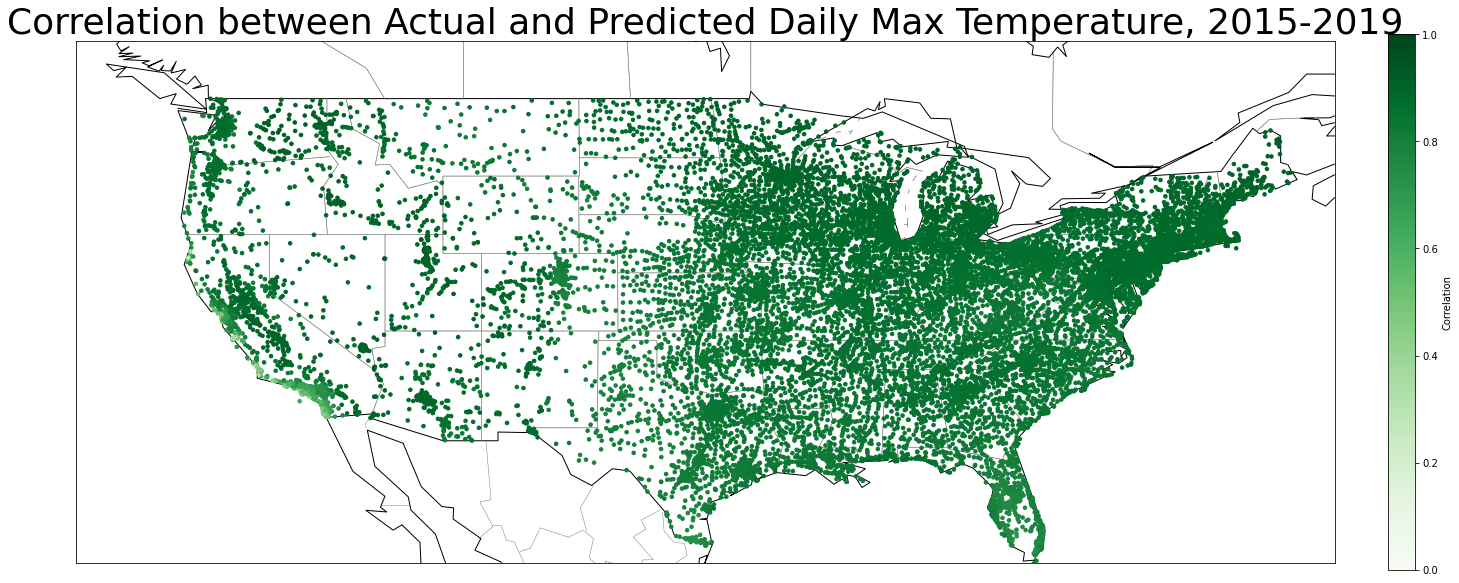

In [112]:
plt.figure(figsize = (24, 16))


lat = tempCorr.lat.values
lon = tempCorr.lon.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, s=50, linewidths=None, marker = ".", 
          c=tempCorr.predTemp,
          zorder=5,
          vmin = 0, 
          vmax = 1, cmap = 'Greens') # 
          # cmap="RdBu", edgecolor="k")
plt.colorbar(label="Correlation", fraction=0.02, pad=0.04)

plt.title("Correlation between Actual and Predicted Daily Max Temperature, 2015-2019", 
          fontsize = 36)

In [97]:
prCorr = corrByLatLon[corrByLatLon.level_3 == 'precipitation'][['lat','lon','predPr']]
prCorr

lat         lon    predPr
0      42.060642  -72.635331  0.003588
4      42.369334  -72.514122  0.014620
8      42.389488  -72.525643  0.018164
12     42.410920  -72.108630  0.015329
16     42.261586  -72.348087  0.016279
...          ...         ...       ...
81200  46.900053 -119.809076  0.172209
81204  46.042820 -118.659740  0.183059
81208  46.263010 -118.152305  0.199592
81212  46.064996 -118.338637  0.172908
81216  46.400982 -117.067815  0.149761

[20305 rows x 3 columns]

Text(0.5, 1.0, 'Correlation between Actual and Predicted Precipitation, 2015-2019')

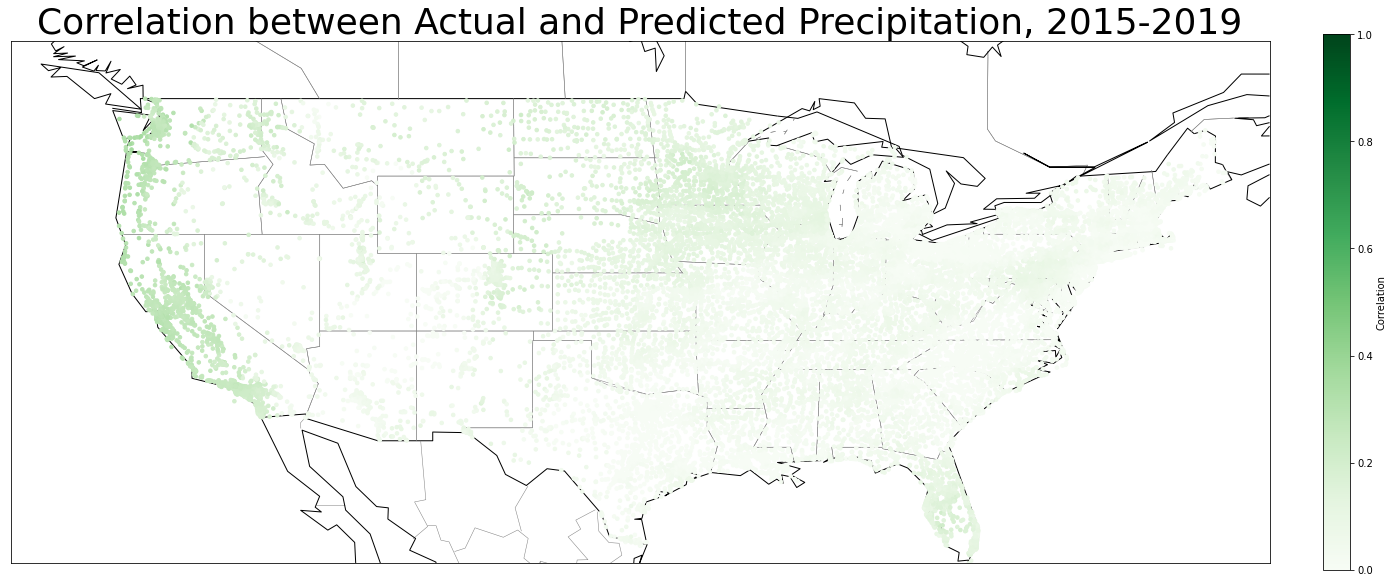

In [110]:
plt.figure(figsize = (24, 16))


lat = prCorr.lat.values
lon = prCorr.lon.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, s=50, linewidths=None, marker = ".", 
          c=prCorr.predPr,
          zorder=5,
          vmin = 0, 
          vmax = 1, cmap = 'Greens') # 
          # cmap="RdBu", edgecolor="k")
plt.colorbar(label="Correlation", fraction=0.02, pad=0.04)

plt.title("Correlation between Actual and Predicted Precipitation, 2015-2019", 
          fontsize = 36)

# Summaries
Summarize some of the data here.

### average weather by coords across ensemble and across time

In [327]:
prAll = getAllData('pr','ssp585').compute(workers = 100)
prAll

tasmaxAll = getAllData('tasmax','ssp585').compute(workers = 100)
tasmaxAll

extremes = pd.DataFrame()

extremes['pr_8099'] = pd.DataFrame(np.concatenate(prAll.sel(time=slice('1981-01-01','1999-12-31')).pr.values).ravel()).sample(frac = 0.01).iloc[:,0]
extremes['pr_2039'] = pd.DataFrame(np.concatenate(prAll.sel(time=slice('2020-01-01','2039-12-31')).pr.values).ravel()).sample(frac = 0.01).iloc[:,0]

extremes['tasmax_8099'] = pd.DataFrame(np.concatenate(tasmaxAll.sel(time=slice('1981-01-01','1999-12-31')).tasmax.values).ravel()).sample(frac = 0.01).iloc[:,0]
extremes['tasmax_2039'] = pd.DataFrame(np.concatenate(tasmaxAll.sel(time=slice('2020-01-01','2039-12-31')).tasmax.values).ravel()).sample(frac = 0.01).iloc[:,0]


extremes['tasmax_8099'] = 1.8*(extremes['tasmax_8099'] - 273) + 32
extremes['tasmax_2039'] = 1.8*(extremes['tasmax_2039'] - 273) + 32



../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/pr/pr_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  1.1920928955078125e-06
../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/tasmax/tasmax_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  5.0067901611328125e-06


Text(0.5, 0, 'Daily Max Temperature')

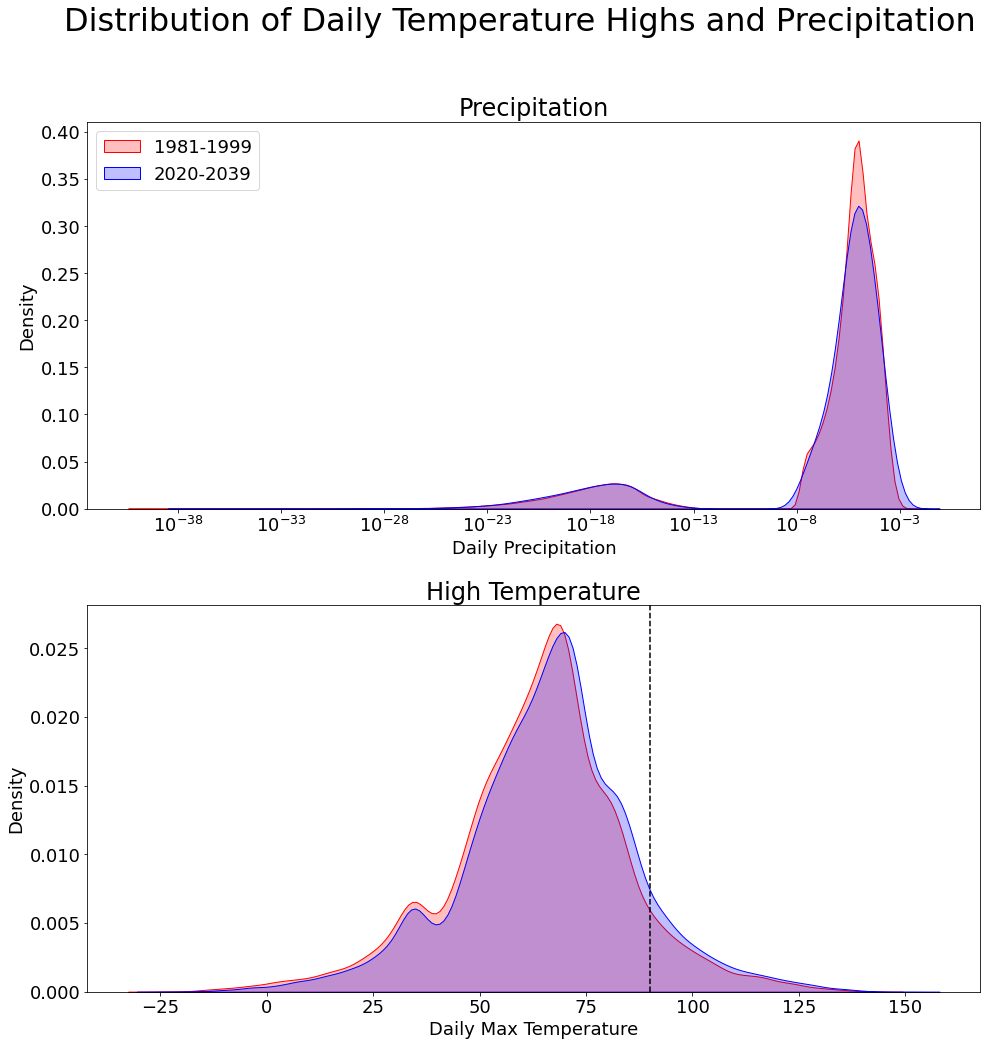

In [331]:
fig = plt.figure(figsize = (16, 16))
fig.subplots_adjust(hspace = 0.25)

fig.suptitle('Distribution of Daily Temperature Highs and Precipitation', fontsize = 32)

ax1 = fig.add_subplot(2,1,1) 
ax1 = sns.kdeplot(extremes['pr_8099'], shade=True, color="r",log_scale = True, label = '1981-1999')
ax1 = sns.kdeplot(extremes['pr_2039'], shade=True, color="b",log_scale = True, label = '2020-2039')
# ax1.axvline(x = winter.temperature.quantile(0.95), color ='black',linestyle = '--')# '--')
#ax1.set(xlim=(0, 0.0005))
ax1.set_title("Precipitation", fontsize = 24)
# ax1.set_xticks([])
# ax1.set_ylim(0, 0.1)
ax1.set_ylabel('Density')
ax1.set_xlabel('Daily Precipitation')
ax1.legend(fontsize = 24)
sns.move_legend(ax1, "upper left")

ax2 = fig.add_subplot(2,1,2) 
ax2 = sns.kdeplot(extremes['tasmax_8099'], shade=True, color="r")
ax2 = sns.kdeplot(extremes['tasmax_2039'], shade=True, color="b")
ax2.axvline(x = 90, color ='black',linestyle = '--')# '--')
ax2.set_title("High Temperature", fontsize = 24)
ax2.set_ylabel('Density')
ax2.set_xlabel('Daily Max Temperature')
# ax2.set_xlim(-10, 50)
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_ylim(0, 0.1)


In [236]:
tasmaxAll = getAllData('tasmax','ssp585').compute(workers = 100)
tasmaxAll

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/tasmax/tasmax_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07


<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 50, lat: 25, lon: 64, time: 21549)
Coordinates:
    height     float64 2.0
    lat_bnds   (lat, bnds) float64 21.01 22.41 22.41 23.81 ... 54.63 54.63 56.03
    lon_bnds   (lon, bnds) float64 201.8 203.2 203.2 204.6 ... 290.4 290.4 291.8
  * lat        (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
  * lon        (lon) float64 -157.5 -156.1 -154.7 ... -71.72 -70.31 -68.91
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-01-02 ... 2040-01-01
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 2039-12-31T12:00:00
Dimensions without coordinates: bnds, ensemble
Data variables:
    tasmax     (ensemble, time, lat, lon) float32 298.45532 ... 259.1733

In [32]:
tasmaxAll = getAllData('tasmax','ssp585')
tasmaxAll['tasmax'] = 1.8*(tasmaxAll.tasmax - 273) + 32

start       = time.time()

overallTemp     = tasmaxAll.mean(dim = ['ensemble','lat','lon'])
overallMeanTemp = pd.Series(overallTemp.tasmax.values)
print(time.time() - start)


# find the standard deviation across all ensembles
overallStdTemp  = tasmaxAll.std(dim = ['ensemble','lat','lon'])
overallStdTemp  = pd.Series(tasmaxAll.mean(dim = ['lat',
                    'lon']).std(dim = ['ensemble']).tasmax.values)
print(time.time() - start)

rollingMean_ssp585  = overallMeanTemp.rolling(365).mean()
rollingUpper_ssp585 = overallMeanTemp.rolling(365).mean() + 1.96*overallStdTemp.rolling(365).mean()
rollingLower_ssp585 = overallMeanTemp.rolling(365).mean() - 1.96*overallStdTemp.rolling(365).mean()

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/tasmax/tasmax_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07


In [41]:
tasmaxAll = getAllData('tasmax','ssp126')
tasmaxAll['tasmax'] = 1.8*(tasmaxAll.tasmax - 273) + 32

start       = time.time()

overallTemp     = tasmaxAll.mean(dim = ['ensemble','lat','lon'])
overallMeanTemp = pd.Series(overallTemp.tasmax.values)
print(time.time() - start)


# find the standard deviation across all ensembles
overallStdTemp  = tasmaxAll.std(dim = ['ensemble','lat','lon'])
overallStdTemp  = pd.Series(tasmaxAll.mean(dim = ['lat',
                    'lon']).std(dim = ['ensemble']).tasmax.values)
print(time.time() - start)

rollingMean_ssp126  = overallMeanTemp.rolling(365).mean()
rollingUpper_ssp126 = overallMeanTemp.rolling(365).mean() + 1.96*overallStdTemp.rolling(365).mean()
rollingLower_ssp126 = overallMeanTemp.rolling(365).mean() - 1.96*overallStdTemp.rolling(365).mean()

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp126/tasmax/tasmax_day_MIROC6_ssp126_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07
33.95875573158264
38.23326373100281


Text(0.5, 1.0, 'Temperature Mean Trend')

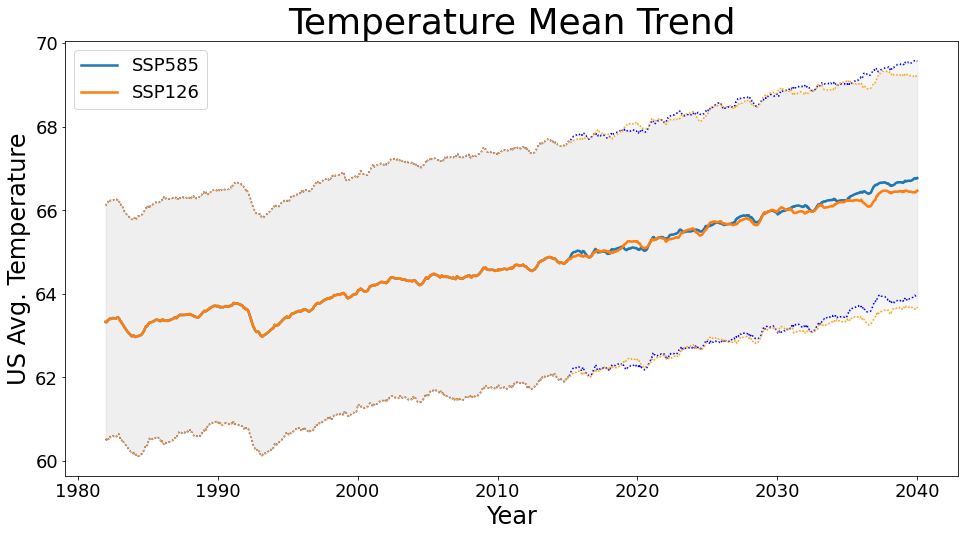

In [55]:
plt.figure(figsize = (16, 8))


times = tasmaxAll.time.values

plt.plot(times,rollingMean_ssp585,linewidth = 2.5, label = 'SSP585')
plt.plot(times,rollingUpper_ssp585, color = 'blue', linestyle = 'dotted')
plt.plot(times,rollingLower_ssp585, color = 'blue', linestyle = 'dotted')
plt.fill_between(times, rollingLower_ssp585, rollingUpper_ssp585, color='lightgrey', alpha=.2)


plt.plot(times,rollingMean_ssp126,linewidth = 2.5, label = 'SSP126')
plt.plot(times,rollingUpper_ssp126, color = 'orange', linestyle = 'dotted')
plt.plot(times,rollingLower_ssp126, color = 'orange', linestyle = 'dotted')
plt.fill_between(times, rollingLower_ssp126, rollingUpper_ssp126, color='lightgrey', alpha=.2)



plt.xlabel('Year', fontsize = 24)
plt.ylabel('US Avg. Temperature', fontsize = 24)
plt.rcParams['font.size'] = 18
plt.legend()

plt.title("Temperature Mean Trend", 
          fontsize = 36)

### precipitation next

In [57]:
import time as time
prAll           = getAllData('pr','ssp585')

start       = time.time()

overallPr     = prAll.mean(dim = ['ensemble','lat','lon'])
overallMeanPr = pd.Series(overallPr.pr.values)
print(time.time() - start)


# find the standard deviation across all ensembles
overallStdPr  = prAll.std(dim = ['ensemble','lat','lon'])
overallStdPr  = pd.Series(prAll.mean(dim = ['lat',
                    'lon']).std(dim = ['ensemble']).pr.values)
print(time.time() - start)

rollingMean_ssp585  = overallMeanPr.rolling(365).mean()
rollingUpper_ssp585 = overallMeanPr.rolling(365).mean() + 1.96*overallStdPr.rolling(365).mean()
rollingLower_ssp585 = overallMeanPr.rolling(365).mean() - 1.96*overallStdPr.rolling(365).mean()

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/pr/pr_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  0.0
84.63253784179688
87.84748792648315


In [58]:
import time as time
prAll           = getAllData('pr','ssp126')

start       = time.time()

overallPr     = prAll.mean(dim = ['ensemble','lat','lon'])
overallMeanPr = pd.Series(overallPr.pr.values)
print(time.time() - start)


# find the standard deviation across all ensembles
overallStdPr  = prAll.std(dim = ['ensemble','lat','lon'])
overallStdPr  = pd.Series(prAll.mean(dim = ['lat',
                    'lon']).std(dim = ['ensemble']).pr.values)
print(time.time() - start)

rollingMean_ssp126  = overallMeanPr.rolling(365).mean()
rollingUpper_ssp126 = overallMeanPr.rolling(365).mean() + 1.96*overallStdPr.rolling(365).mean()
rollingLower_ssp126  = overallMeanPr.rolling(365).mean() - 1.96*overallStdPr.rolling(365).mean()

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp126/pr/pr_day_MIROC6_ssp126_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07
48.68141531944275
51.89646315574646


Text(0.5, 1.0, 'Precipitation Mean Trend')

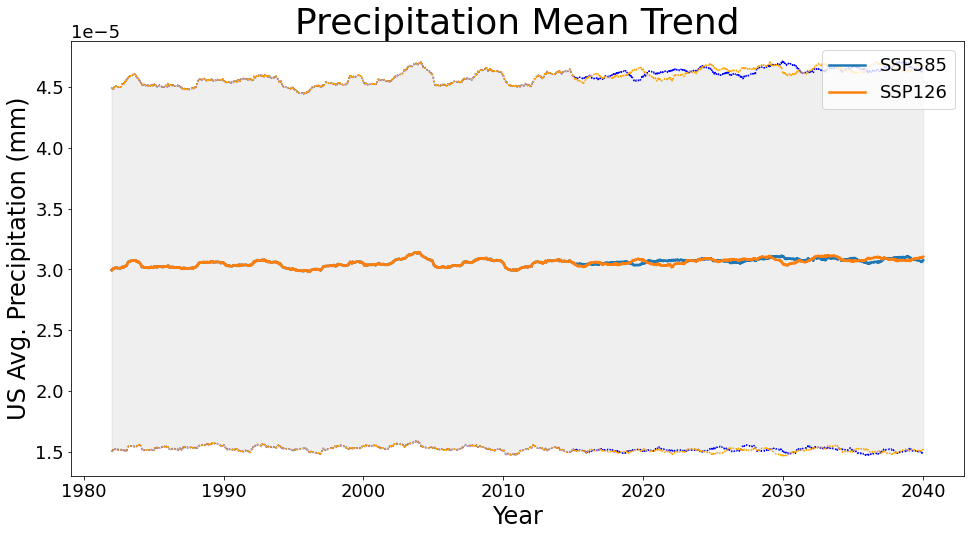

In [62]:
plt.figure(figsize = (16, 8))


times = prAll.time.values

plt.plot(times,rollingMean_ssp585,linewidth = 2.5, label = 'SSP585')
plt.plot(times,rollingUpper_ssp585, color = 'blue', linestyle = 'dotted')
plt.plot(times,rollingLower_ssp585, color = 'blue', linestyle = 'dotted')
plt.fill_between(time, rollingLower_ssp585, rollingUpper_ssp585, color='lightgrey', alpha=.2)


plt.plot(times,rollingMean_ssp126,linewidth = 2.5, label = 'SSP126')
plt.plot(times,rollingUpper_ssp126, color = 'orange', linestyle = 'dotted')
plt.plot(times,rollingLower_ssp126, color = 'orange', linestyle = 'dotted')
plt.fill_between(times, rollingLower_ssp126, rollingUpper_ssp126, color='lightgrey', alpha=.2)



plt.xlabel('Year', fontsize = 24)
plt.ylabel('US Avg. Precipitation (mm)', fontsize = 24)
plt.rcParams['font.size'] = 18
plt.legend()

plt.title("Precipitation Mean Trend", 
          fontsize = 36)

In [15]:
outfile =  '../../data/companyData/miroc_historicalMean.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(overallMean, pickle_file)
    
outfile =  '../../data/companyData/miroc_historicalStdDev.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(overallStd, pickle_file)

In [ ]:
'''start       = time.time()


byCoord = data.mean(dim = ['ensemble','time'])
ensembleMeanByCoord = byCoord.pr.values

time.time() - start'''

# Find Extremes

In [14]:
def getFutureData(weather,scenario):

    start = time.time()
    
    file = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + scenario + '/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn.nc'
    data = xr.open_mfdataset(file,concat_dim=['ensemble'],combine='nested',decode_times=True)
    
    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    data = data.sortby(data.lon)

    data = data.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2019-01-01','2039-12-31'))

    data['time'] = pd.to_datetime(data.time.values.astype(str))
    
    print("starting to load")
    start = time.time()
    # data = data.compute(workers = 100)

    time.time() - start

    # , ,combine = 'by_coords')   #  nc.Dataset(file)

    print("ending the load: ", time.time() - start)

    return(data)

def getHistData(weather):

    start = time.time()

    
    file = '../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/' + weather + '/' + weather + '_day_MIROC6_historical_r*i1p1f1_gn.nc'
    data = xr.open_mfdataset(file,concat_dim=['ensemble'],combine='nested',decode_times=True)


    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    data = data.sortby(data.lon)

    data = data.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('1981-01-01','1999-12-31'))

    data['time'] = pd.to_datetime(data.time.values.astype(str))
    
    print("starting to load")
    start = time.time()
    data = data.compute(workers = 100)

    time.time() - start

    # , ,combine = 'by_coords')   #  nc.Dataset(file)

    print("ending the load: ", time.time() - start)

    return(data)

## 95th percentile by ensemble
find percentile by quarter

In [15]:
import time as time
tasmaxHist = getHistData('tasmax')
prHist = getHistData('pr')

starting to load
ending the load:  42.84532880783081
starting to load
ending the load:  39.08367896080017


### precipitation first
historical precipitation - 95th percentile

In [16]:
start                         = time.time()
pr95s = prHist.pr.groupby(prHist.time.dt.quarter).quantile(0.95, dim = ('time'))
print(time.time() - start)
pr95s

21.560193061828613


<xarray.DataArray 'pr' (ensemble: 50, quarter: 4, lat: 25, lon: 64)>
array([[[[1.31641405e-04, 1.29563061e-04, 1.41702030e-04, ...,
          7.71693347e-05, 9.02451869e-05, 1.17158434e-04],
         [1.53154889e-04, 1.36542944e-04, 1.63721963e-04, ...,
          6.25144174e-05, 7.34195248e-05, 9.82391975e-05],
         [1.76013001e-04, 1.56153471e-04, 1.88045231e-04, ...,
          1.06384704e-04, 1.00254947e-04, 1.14234017e-04],
         ...,
         [1.37293169e-04, 1.35814769e-04, 1.26326129e-04, ...,
          7.51285956e-05, 8.21820748e-05, 9.68405755e-05],
         [1.45925458e-04, 1.41054976e-04, 1.34134756e-04, ...,
          6.84649225e-05, 7.72470990e-05, 8.64323662e-05],
         [1.54982315e-04, 1.54048181e-04, 1.46424538e-04, ...,
          6.22714986e-05, 7.16748273e-05, 8.41733585e-05]],

        [[5.03627227e-05, 5.72173223e-05, 6.14132878e-05, ...,
          2.04839584e-04, 2.13738059e-04, 2.08263827e-04],
         [5.26003074e-05, 5.29110395e-05, 4.31492328e-05, ...

and future. load it, subtract off 95th percentile each quarter, and count the number of instances > 95th percentile

In [17]:
prFuture = getFutureData('pr','ssp585')

starting to load
ending the load:  9.5367431640625e-07


In [18]:
def getFuture_95s(weather,scenario, quarter): 
    # get the past 95s
    pastData = getHistData(weather)
    past95s  = pastData[weather].groupby(pastData.time.dt.quarter).quantile(0.95, dim = ('time'))
    
    # use these to count occurrences
    futureData = getFutureData(weather,scenario)
    
    weatherExtremes = (1*(futureData.where(futureData.time.dt.quarter == quarter, drop = True)[weather] - 
     past95s.where(past95s.quarter == quarter, drop = True)) > 0)
    
    weatherAvg = weatherExtremes.groupby(weatherExtremes.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)
        
    return(weatherAvg)

# def getFutureData(weather,scenario):



In [19]:
tasmaxHist = getHistData('tasmax')
tasmaxHist = tasmaxHist.expand_dims(quarter = tasmaxHist.time.dt.quarter)
'''tasmaxHist['quarter'] = tasmaxHist.time.dt.quarter
tasmaxHist['tasmax']'''

tasmaxHist

starting to load
ending the load:  17.64743185043335


<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 50, lat: 25, lon: 64, quarter: 6939, time: 6939)
Coordinates:
  * quarter    (quarter) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 4 4 4 4
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-01-02 ... 2000-01-01
    height     float64 2.0
    lon_bnds   (lon, bnds) float64 201.8 203.2 203.2 204.6 ... 290.4 290.4 291.8
    lat_bnds   (lat, bnds) float64 21.01 22.41 22.41 23.81 ... 54.63 54.63 56.03
  * lon        (lon) float64 -157.5 -156.1 -154.7 ... -71.72 -70.31 -68.91
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat        (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
Dimensions without coordinates: bnds, ensemble
Data variables:
    tasmax     (quarter, ensemble, time, lat, lon) float32 298.45532 ... 263.53885
Attributes:
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child

In [20]:
scenario = 'ssp585'
tasmaxFuture = getFutureData('tasmax',scenario)
tasmaxFuture['tasmax_F'] = 1.8*(tasmaxFuture['tasmax']-273) + 32

tasmaxHist   = getHistData('tasmax')
tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32


starting to load
ending the load:  1.1920928955078125e-06
starting to load
ending the load:  2.3190720081329346


In [21]:
tasmaxFuture

<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 50, lat: 25, lon: 64, time: 7670)
Coordinates:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(7670, 2), meta=np.ndarray>
    height     float64 2.0
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(25, 2), meta=np.ndarray>
  * lon        (lon) float64 -157.5 -156.1 -154.7 ... -71.72 -70.31 -68.91
  * time       (time) datetime64[ns] 2019-01-01T12:00:00 ... 2039-12-31T12:00:00
  * lat        (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
Dimensions without coordinates: bnds, ensemble
Data variables:
    tasmax     (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 7670, 25, 64), meta=np.ndarray>
    tasmax_F   (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 7670, 25, 64), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             ScenarioMIP
    br

In [22]:
tasmaxHist.tasmax_F.values

array([[[[ 7.78195801e+01,  7.52290573e+01,  7.19331589e+01, ...,
           7.83441772e+01,  7.76210022e+01,  7.74282990e+01],
         [ 7.26681976e+01,  7.16871185e+01,  7.05489960e+01, ...,
           7.69689026e+01,  7.60323181e+01,  7.54780579e+01],
         [ 7.11773529e+01,  7.05163574e+01,  7.00895386e+01, ...,
           7.54009933e+01,  7.47400055e+01,  7.39634323e+01],
         ...,
         [ 4.45046921e+01,  4.40838089e+01,  4.31027298e+01, ...,
           1.16729317e+01,  9.91825104e+00,  9.26912308e+00],
         [ 4.07078743e+01,  3.98483047e+01,  3.85234070e+01, ...,
           1.13350468e+01,  1.08044624e+01,  1.13439465e+01],
         [ 3.62056198e+01,  3.64071655e+01,  3.65790482e+01, ...,
           1.47020817e+01,  1.46428108e+01,  1.50636959e+01]],

        [[ 8.18901825e+01,  7.73233795e+01,  7.25390015e+01, ...,
           7.74852142e+01,  7.70248871e+01,  7.64641418e+01],
         [ 7.38808746e+01,  7.17439728e+01,  7.03798065e+01, ...,
           7.64139328e

In [23]:
np.sum(tasmaxHist.tasmax_F.values > 90)*7670/6939

48338275.461882114

In [24]:
np.sum(tasmaxFuture.tasmax_F.values > 90)

59821261

In [25]:
def getFuture_90F(scenario, quarter): 
    # get the past 95s 
    tasmaxHist = getHistData('tasmax')
    tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32
    tasmaxHist['extreme']  = 1*(tasmaxHist.tasmax_F > 90)
        
    tasmaxHist_here = tasmaxHist.where(tasmaxHist.time.dt.quarter == quarter, drop = True).extreme.values
    tasmaxHist_90s  = tasmaxHist_here.groupby(tasmaxHist_here.time.dt.year).\
        sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)
    
    
    
    # use these to count occurrences
    tasmaxFuture = getFutureData('tasmax',scenario)
    tasmaxFuture['tasmax_F'] = 1.8*(tasmaxFuture['tasmax']-273) + 32
    tasmaxFuture['extreme']  = 1*(tasmaxFuture.tasmax_F > 90)


    tasmaxFuture = tasmaxFuture.where(tasmaxFuture.time.dt.quarter == quarter, drop = True).extreme
    # tasmaxFuture_90s = tasmaxFuture.groupby(tasmaxFuture.time.dt.year).\
    #     sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100) - tasmaxHist_90s
        
    return(tasmaxFuture, tasmaxHist_here)

# def getFutureData(weather,scenario):



In [26]:
## ** testing ** ##
scenario = 'ssp585'
quarter  = 1

tasmaxHist = getHistData('tasmax')
tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32
tasmaxHist['extreme']  = 1*(tasmaxHist.tasmax_F > 90)

tasmaxHist_here = tasmaxHist.where(tasmaxHist.time.dt.quarter == quarter, drop = True) # .extreme
'''tasmaxHist_90s  = tasmaxHist_here.groupby(tasmaxHist_here.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)'''



tasmaxFuture = getFutureData('tasmax',scenario)
tasmaxFuture['tasmax_F'] = 1.8*(tasmaxFuture['tasmax']-273) + 32
tasmaxFuture['extreme']  = 1*(tasmaxFuture.tasmax_F > 90)


tasmaxFuture_here = tasmaxFuture.where(tasmaxFuture.time.dt.quarter == quarter, drop = True) # .extreme

starting to load
ending the load:  16.267191886901855
starting to load
ending the load:  0.0


In [27]:
tasmaxHist_here

<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 50, lat: 25, lon: 64, time: 1714)
Coordinates:
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-01-02 ... 1999-04-01
    height     float64 2.0
    lon_bnds   (lon, bnds) float64 201.8 203.2 203.2 204.6 ... 290.4 290.4 291.8
    lat_bnds   (lat, bnds) float64 21.01 22.41 22.41 23.81 ... 54.63 54.63 56.03
  * lon        (lon) float64 -157.5 -156.1 -154.7 ... -71.72 -70.31 -68.91
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 1999-03-31T12:00:00
  * lat        (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
Dimensions without coordinates: bnds, ensemble
Data variables:
    tasmax     (ensemble, time, lat, lon) float32 298.45532 ... 272.1231
    tasmax_F   (ensemble, time, lat, lon) float32 77.81958 ... 30.421595
    extreme    (ensemble, time, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method

In [190]:
tasmaxFuture_here['dim'] = (0.0*tasmaxFuture_here.tasmax_F) + 1

tasmaxFuture_here.groupby(tasmaxFuture_here.time.dt.year).sum(dim = ['time']).\
    mean(dim = ['year','ensemble']).compute(workers = 100)

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 25, lon: 64)
Coordinates:
    height    float64 2.0
    lon_bnds  (lon, bnds) float64 201.8 203.2 203.2 204.6 ... 290.4 290.4 291.8
    lat_bnds  (lat, bnds) float64 21.01 22.41 22.41 23.81 ... 54.63 54.63 56.03
  * lon       (lon) float64 -157.5 -156.1 -154.7 -153.3 ... -71.72 -70.31 -68.91
  * lat       (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
Dimensions without coordinates: bnds
Data variables:
    tasmax    (lat, lon) float32 27174.355 27014.8 26798.18 ... 23535.96 23546.7
    tasmax_F  (lat, lon) float32 7458.4585 7171.2554 ... 909.3522 928.67773
    extreme   (lat, lon) float64 3.332 0.04286 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dim       (lat, lon) float32 90.2381 90.2381 90.2381 ... 90.2381 90.2381

In [189]:
tasmaxHist_here['dim'] = (0.0*tasmaxHist_here.tasmax_F) + 1


tasmaxHist_here.groupby(tasmaxHist_here.time.dt.year).sum(dim = ['time']).\
    mean(dim = ['year','ensemble']).compute(workers = 100)



<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 25, lon: 64)
Coordinates:
    height    float64 2.0
    lon_bnds  (lon, bnds) float64 201.8 203.2 203.2 204.6 ... 290.4 290.4 291.8
    lat_bnds  (lat, bnds) float64 21.01 22.41 22.41 23.81 ... 54.63 54.63 56.03
  * lon       (lon) float64 -157.5 -156.1 -154.7 -153.3 ... -71.72 -70.31 -68.91
  * lat       (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
Dimensions without coordinates: bnds
Data variables:
    tasmax    (lat, lon) float32 27087.559 26937.043 ... 23334.11 23348.293
    tasmax_F  (lat, lon) float32 7314.898 7043.958 ... 558.63495 584.186
    extreme   (lat, lon) float64 1.182 0.007368 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dim       (lat, lon) float32 90.210526 90.210526 ... 90.210526 90.210526

In [217]:
len(tasmaxFuture_here.extreme[0][0][0])

64

In [208]:
len(tasmaxHist_here.extreme.values)

50

In [211]:
tasmaxHist_here.extreme[0].values

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [207]:
np.sum(tasmaxHist_here.extreme.values)

1244895.0

In [206]:
np.sum(tasmaxFuture_here.extreme.values)

2035668.0

In [173]:
# tasmaxHist_here['dims'] = 1
tasmaxHist_here.groupby(tasmaxHist_here.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100).dims

('lat', 'lon')

In [166]:
### end testing ###

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 1., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [28]:
print('ssp585 - pr')
prQ1_ssp585_95s = getFuture_95s('pr','ssp585',1)
prQ2_ssp585_95s = getFuture_95s('pr','ssp585',2)
prQ3_ssp585_95s = getFuture_95s('pr','ssp585',3)
prQ4_ssp585_95s = getFuture_95s('pr','ssp585',4)

print('ssp126 - pr')
prQ1_ssp126_95s = getFuture_95s('pr','ssp126',1)
prQ2_ssp126_95s = getFuture_95s('pr','ssp126',2)
prQ3_ssp126_95s = getFuture_95s('pr','ssp126',3)
prQ4_ssp126_95s = getFuture_95s('pr','ssp126',4)

ssp585 - pr
starting to load
ending the load:  38.5776641368866
starting to load
ending the load:  0.0
starting to load
ending the load:  20.91117286682129
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  8.875853061676025
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  2.4371790885925293
starting to load
ending the load:  9.5367431640625e-07
ssp126 - pr
starting to load
ending the load:  3.7132418155670166
starting to load
ending the load:  0.0
starting to load
ending the load:  35.679723024368286
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  29.91689705848694
starting to load
ending the load:  0.0
starting to load
ending the load:  19.186942100524902
starting to load
ending the load:  1.1920928955078125e-06


In [29]:
print('ssp585 - tasmax')
tasmaxQ1_ssp585_95s = getFuture_95s('tasmax','ssp585',1)
tasmaxQ2_ssp585_95s = getFuture_95s('tasmax','ssp585',2)
tasmaxQ3_ssp585_95s = getFuture_95s('tasmax','ssp585',3)
tasmaxQ4_ssp585_95s = getFuture_95s('tasmax','ssp585',4)

print('ssp126 - tasmax')
tasmaxQ1_ssp126_95s = getFuture_95s('tasmax','ssp126',1)
tasmaxQ2_ssp126_95s = getFuture_95s('tasmax','ssp126',2)
tasmaxQ3_ssp126_95s = getFuture_95s('tasmax','ssp126',3)
tasmaxQ4_ssp126_95s = getFuture_95s('tasmax','ssp126',4)

ssp585 - tasmax
starting to load
ending the load:  43.412338733673096
starting to load
ending the load:  1.9073486328125e-06
starting to load
ending the load:  3.7468008995056152


KeyboardInterrupt: 

In [ ]:
tasmaxQ4_ssp126_95s.head()

### temperature next - 90F

In [30]:
def getFuture_90F(scenario, quarter): 
    tasmaxHist = getHistData('tasmax')
    tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32
    tasmaxHist['extreme']  = 1*(tasmaxHist.tasmax_F > 90)
    
    # get the past 95s 
    tasmaxHist_here = tasmaxHist.where(tasmaxHist.time.dt.quarter == quarter, drop = True).extreme
    tasmaxHist_90s  = tasmaxHist_here.groupby(tasmaxHist_here.time.dt.year).\
        sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)
    
    
    
    # use these to count occurrences
    tasmaxFuture = getFutureData('tasmax',scenario)
    tasmaxFuture['tasmax_F'] = 1.8*(tasmaxFuture['tasmax']-273) + 32
    tasmaxFuture['extreme']  = 1*(tasmaxFuture.tasmax_F > 90)


    tasmaxFuture = tasmaxFuture.where(tasmaxFuture.time.dt.quarter == quarter, drop = True).extreme
    tasmaxFuture_90s = tasmaxFuture.groupby(tasmaxFuture.time.dt.year).\
        sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100) - tasmaxHist_90s
        
    return(tasmaxFuture_90s)

# def getFutureData(weather,scenario):



In [31]:
quarter = 1

tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32
tasmaxHist['extreme']  = 1*(tasmaxHist.tasmax_F > 90)


tasmaxHist_here = tasmaxHist.where(tasmaxHist.time.dt.quarter == quarter, drop = True).extreme
tasmaxHist_90s  = tasmaxHist_here.groupby(tasmaxHist_here.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)

tasmaxHist_90s

<xarray.DataArray 'extreme' (lat: 25, lon: 64)>
array([[1.18210526, 0.00736842, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 -157.5 -156.1 -154.7 -153.3 ... -71.72 -70.31 -68.91
  * lat      (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33

In [32]:
scenario = 'ssp585'
quarter  = 1

tasmaxFuture = getFutureData('tasmax',scenario)
tasmaxFuture['tasmax_F'] = 1.8*(tasmaxFuture['tasmax']-273) + 32
tasmaxFuture['extreme']  = 1*(tasmaxFuture.tasmax_F > 90)


tasmaxFuture = tasmaxFuture.where(tasmaxFuture.time.dt.quarter == quarter, drop = True).extreme

test = tasmaxFuture.groupby(tasmaxFuture.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)

tasmaxFuture_90s = tasmaxFuture.groupby(tasmaxFuture.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100) - tasmaxHist_90s

tasmaxFuture_90s_noDifference = tasmaxFuture.groupby(tasmaxFuture.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)

starting to load
ending the load:  1.1920928955078125e-06


In [33]:
tasmaxHist = getHistData('tasmax')
tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32
tasmaxHist['extreme']  = 1*(tasmaxHist['tasmax_F'] > 90)

starting to load
ending the load:  16.24377679824829


In [34]:
print('ssp585 - tasmax')
tasmaxQ1_ssp585_90F = getFuture_90F('ssp585',1)
tasmaxQ2_ssp585_90F = getFuture_90F('ssp585',2)
tasmaxQ3_ssp585_90F = getFuture_90F('ssp585',3)
tasmaxQ4_ssp585_90F = getFuture_90F('ssp585',4)



print('ssp126 - tasmax')
tasmaxQ1_ssp126_90F = getFuture_90F('ssp126',1)
tasmaxQ2_ssp126_90F = getFuture_90F('ssp126',2)
tasmaxQ3_ssp126_90F = getFuture_90F('ssp126',3)
tasmaxQ4_ssp126_90F = getFuture_90F('ssp126',4)

ssp585 - tasmax
starting to load
ending the load:  2.915637969970703
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  42.57487511634827
starting to load
ending the load:  0.0
starting to load
ending the load:  42.34825396537781
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  42.37581825256348
starting to load
ending the load:  1.1920928955078125e-06
ssp126 - tasmax
starting to load
ending the load:  42.58375382423401
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  42.64632296562195
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  42.617794036865234
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  43.95320987701416
starting to load
ending the load:  1.6689300537109375e-06


In [35]:
tasmaxQ2_ssp585_90F.mean()

<xarray.DataArray 'extreme' ()>
array(2.37408462)
Coordinates:
    height   float64 2.0

In [36]:
print(np.median(tasmaxQ1_ssp585_90F))
print(np.median(tasmaxQ2_ssp585_90F))
print(np.median(tasmaxQ3_ssp585_90F))
print(np.median(tasmaxQ4_ssp585_90F))

0.0
0.0431328320802005
0.1668421052631579
0.0


In [37]:
print(np.mean(tasmaxQ1_ssp585_90F))
print(np.mean(tasmaxQ2_ssp585_90F))
print(np.mean(tasmaxQ3_ssp585_90F))
print(np.mean(tasmaxQ4_ssp585_90F))

<xarray.DataArray 'extreme' ()>
array(0.39269727)
Coordinates:
    height   float64 2.0
<xarray.DataArray 'extreme' ()>
array(2.37408462)
Coordinates:
    height   float64 2.0
<xarray.DataArray 'extreme' ()>
array(3.42591388)
Coordinates:
    height   float64 2.0
<xarray.DataArray 'extreme' ()>
array(0.6445865)
Coordinates:
    height   float64 2.0


In [38]:
outfile =  '../../data/companyData/tasmaxQ1_ssp126_90F.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(tasmaxQ1_ssp126_90F, pickle_file)
    
outfile =  '../../data/companyData/tasmaxQ2_ssp126_90F.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(tasmaxQ2_ssp126_90F, pickle_file)
    
outfile =  '../../data/companyData/tasmaxQ3_ssp126_90F.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(tasmaxQ3_ssp126_90F, pickle_file)
    
outfile =  '../../data/companyData/tasmaxQ4_ssp126_90F.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(tasmaxQ4_ssp126_90F, pickle_file)

outfile =  '../../data/companyData/tasmaxQ1_ssp585_90F.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(tasmaxQ1_ssp585_90F, pickle_file)
    
outfile =  '../../data/companyData/tasmaxQ2_ssp585_90F.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(tasmaxQ2_ssp585_90F, pickle_file)
    
outfile =  '../../data/companyData/tasmaxQ3_ssp585_90F.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(tasmaxQ3_ssp585_90F, pickle_file)
    
outfile =  '../../data/companyData/tasmaxQ4_ssp585_90F.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(tasmaxQ4_ssp585_90F, pickle_file)

In [39]:
outfile =  '../../data/companyData/prQ1_ssp126_95s.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(prQ1_ssp126_95s, pickle_file)
    
outfile =  '../../data/companyData/prQ2_ssp126_95s.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(prQ2_ssp126_95s, pickle_file)
    
outfile =  '../../data/companyData/prQ3_ssp126_95s.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(prQ3_ssp126_95s, pickle_file)
    
outfile =  '../../data/companyData/prQ4_ssp126_95s.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(prQ4_ssp126_95s, pickle_file)

outfile =  '../../data/companyData/prQ1_ssp585_95s.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(prQ1_ssp585_95s, pickle_file)
    
outfile =  '../../data/companyData/prQ2_ssp585_95s.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(prQ2_ssp585_95s, pickle_file)
    
outfile =  '../../data/companyData/prQ3_ssp585_95s.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(prQ3_ssp585_95s, pickle_file)
    
outfile =  '../../data/companyData/prQ4_ssp585_95s.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(prQ4_ssp585_95s, pickle_file)

## Merge Everything In
Currently we have the hqs in hqtest

In [6]:
file = open('../../data/companyData/prQ1_ssp126_95s.pkl','rb')
prQ1_ssp126_95s = pkl.load(file)

file = open('../../data/companyData/prQ2_ssp126_95s.pkl','rb')
prQ2_ssp126_95s = pkl.load(file)

file = open('../../data/companyData/prQ3_ssp126_95s.pkl','rb')
prQ3_ssp126_95s = pkl.load(file)

file = open('../../data/companyData/prQ4_ssp126_95s.pkl','rb')
prQ4_ssp126_95s = pkl.load(file)

file = open('../../data/companyData/prQ1_ssp585_95s.pkl','rb')
prQ1_ssp585_95s = pkl.load(file)

file = open('../../data/companyData/prQ2_ssp585_95s.pkl','rb')
prQ2_ssp585_95s = pkl.load(file)

file = open('../../data/companyData/prQ3_ssp585_95s.pkl','rb')
prQ3_ssp585_95s = pkl.load(file)

file = open('../../data/companyData/prQ4_ssp585_95s.pkl','rb')
prQ4_ssp585_95s = pkl.load(file)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/companyData/prQ1_ssp585_95s.pkl'

In [ ]:
print('ssp585 - pr')
prQ1_ssp585_95s = getFuture_95s('pr','ssp585',1)
prQ2_ssp585_95s = getFuture_95s('pr','ssp585',2)
prQ3_ssp585_95s = getFuture_95s('pr','ssp585',3)
prQ4_ssp585_95s = getFuture_95s('pr','ssp585',4)

print('ssp126 - pr')
prQ1_ssp126_95s = getFuture_95s('pr','ssp126',1)
prQ2_ssp126_95s = getFuture_95s('pr','ssp126',2)
prQ3_ssp126_95s = getFuture_95s('pr','ssp126',3)
prQ4_ssp126_95s = getFuture_95s('pr','ssp126',4)

print('ssp585 - tasmax')
tasmaxQ1_ssp585_95s = getFuture_95s('tasmax','ssp585',1)
tasmaxQ2_ssp585_95s = getFuture_95s('tasmax','ssp585',2)
tasmaxQ3_ssp585_95s = getFuture_95s('tasmax','ssp585',3)
tasmaxQ4_ssp585_95s = getFuture_95s('tasmax','ssp585',4)

print('ssp126 - tasmax')
tasmaxQ1_ssp126_95s = getFuture_95s('tasmax','ssp126',1)
tasmaxQ2_ssp126_95s = getFuture_95s('tasmax','ssp126',2)
tasmaxQ3_ssp126_95s = getFuture_95s('tasmax','ssp126',3)
tasmaxQ4_ssp126_95s = getFuture_95s('tasmax','ssp126',4)



tasmaxQ1_ssp585_90F = getFuture_90F('ssp585',1)
tasmaxQ2_ssp585_90F = getFuture_90F('ssp585',2)
tasmaxQ3_ssp585_90F = getFuture_90F('ssp585',3)
tasmaxQ4_ssp585_90F = getFuture_90F('ssp585',4)

print('ssp126 - tasmax')
tasmaxQ1_ssp126_90F = getFuture_90F('ssp126',1)
tasmaxQ2_ssp126_90F = getFuture_90F('ssp126',2)
tasmaxQ3_ssp126_90F = getFuture_90F('ssp126',3)
tasmaxQ4_ssp126_90F = getFuture_90F('ssp126',4)

In [40]:
np.mean(tasmaxQ4_ssp126_90F.values)

0.6418430451127819

In [41]:
def findClosest(row):
    ################
    # pr scenarios
    closestVal_pr1_ssp585 = prQ1_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr2_ssp585 = prQ2_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr3_ssp585 = prQ3_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr4_ssp585 = prQ4_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    closestVal_pr1_ssp126 = prQ1_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr2_ssp126 = prQ2_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr3_ssp126 = prQ3_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr4_ssp126 = prQ4_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    
    ################
    # tasmax scenarios
    closestVal_tasmax1_ssp585_95s = tasmaxQ1_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax2_ssp585_95s = tasmaxQ2_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax3_ssp585_95s = tasmaxQ3_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax4_ssp585_95s = tasmaxQ4_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    closestVal_tasmax1_ssp126_95s = tasmaxQ1_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax2_ssp126_95s = tasmaxQ2_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax3_ssp126_95s = tasmaxQ3_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax4_ssp126_95s = tasmaxQ4_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    
    # absolutes
    closestVal_tasmax1_ssp585_90F = tasmaxQ1_ssp585_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax2_ssp585_90F = tasmaxQ2_ssp585_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax3_ssp585_90F = tasmaxQ3_ssp585_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax4_ssp585_90F = tasmaxQ4_ssp585_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    closestVal_tasmax1_ssp126_90F = tasmaxQ1_ssp126_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax2_ssp126_90F = tasmaxQ2_ssp126_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax3_ssp126_90F = tasmaxQ3_ssp126_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax4_ssp126_90F = tasmaxQ4_ssp126_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values


    
    return(closestVal_pr1_ssp585.item(), closestVal_pr2_ssp585.item(), closestVal_pr3_ssp585.item(), closestVal_pr4_ssp585.item(),
           closestVal_pr1_ssp126.item(), closestVal_pr2_ssp126.item(), closestVal_pr3_ssp126.item(), closestVal_pr4_ssp126.item(),
           closestVal_tasmax1_ssp585_95s.item(), closestVal_tasmax2_ssp585_95s.item(), closestVal_tasmax3_ssp585_95s.item(), closestVal_tasmax4_ssp585_95s.item(),
           closestVal_tasmax1_ssp126_95s.item(), closestVal_tasmax2_ssp126_95s.item(), closestVal_tasmax3_ssp126_95s.item(), closestVal_tasmax4_ssp126_95s.item(),
           closestVal_tasmax1_ssp585_90F.item(), closestVal_tasmax2_ssp585_90F.item(), closestVal_tasmax3_ssp585_90F.item(), closestVal_tasmax4_ssp585_90F.item(),
           closestVal_tasmax1_ssp126_90F.item(), closestVal_tasmax2_ssp126_90F.item(), closestVal_tasmax3_ssp126_90F.item(), closestVal_tasmax4_ssp126_90F.item())

In [254]:
locData_withFracs = pd.read_csv('../../data/companyData/fractionEmployees_byEstablishment.csv')
'''[['zipcode','latitude','longitude']].drop_duplicates().rename(columns = {'lon': 'longitude',
                                                                            'lat': 'latitude'})'''
# find the last year for everything
idx = locData_withFracs.groupby(['parent_number'])['archive_version_year'].transform(max) == locData_withFracs['archive_version_year']

locData_withFracs = locData_withFracs[idx]

locData = locData_withFracs[['zipcode','latitude','longitude']].drop_duplicates().\
    rename(columns = {'lon': 'longitude', 'lat': 'latitude'})


locData['zipcode'] = locData['zipcode'].astype('int64')

locData.rename(columns = {'latitude': 'lat',
                         'longitude': 'lon'}, 
              inplace = True)


locDataByZips = locData.groupby('zipcode').mean().reset_index()

# item = findClosest(hqTest.iloc[0,:],prQ4Avg)

In [257]:
locDataByZips.head()

zipcode        lat       lon
0      603  18.447890 -67.14687
1      604  18.428352 -67.15503
2      605  18.445100 -67.14130
3      612  18.460900 -66.72070
4      613  18.458000 -66.73750

In [256]:
locDataByZips.shape

(20134, 3)

In [253]:
locData.shape

(175485, 3)

In [67]:
sum(locData_withFracs.parent_number.isin(goodsData.gvkey))

NameError: name 'goodsData' is not defined

In [41]:
# closestVal_pr1_ssp585.item(), closestVal_pr2_ssp585.item(), closestVal_pr3_ssp585.item(), closestVal_pr4_ssp585.item(),
# closestVal_pr1_ssp126.item(), closestVal_pr2_ssp126.item(), closestVal_pr3_ssp126.item(), closestVal_pr4_ssp126.item(),
# closestVal_tasmax1_ssp585_95s.item(), closestVal_tasmax2_ssp585_95s.item(), closestVal_tasmax3_ssp585_95s.item(), closestVal_tasmax4_ssp585_95s.item(),
# closestVal_tasmax1_ssp126_95s.item(), closestVal_tasmax2_ssp126_95s.item(), closestVal_tasmax3_ssp126_95s.item(), closestVal_tasmax4_ssp126_95s.item(),
closestVal_tasmax1_ssp585_90F.item(), closestVal_tasmax2_ssp585_90F.item(), closestVal_tasmax3_ssp585_90F.item(), closestVal_tasmax4_ssp585_90F.item(),
closestVal_tasmax1_ssp126_90F.item(), closestVal_tasmax2_ssp126_90F.item(), closestVal_tasmax3_ssp126_90F.item(), closestVal_tasmax4_ssp126_90F.item()


SyntaxError: invalid syntax (<ipython-input-41-dff938a3092d>, line 6)

In [74]:
test = pd.DataFrame(allQuarters.tolist(), index=allQuarters.index)
test.head()

0         1         2         3         4         5         6   \
0  4.667619  5.301905  3.742857  4.662857  4.526667  5.009524  4.018095   
1  4.667619  5.301905  3.742857  4.662857  4.526667  5.009524  4.018095   
2  4.667619  5.301905  3.742857  4.662857  4.526667  5.009524  4.018095   
3  4.667619  5.301905  3.742857  4.662857  4.526667  5.009524  4.018095   
4  4.667619  5.301905  3.742857  4.662857  4.526667  5.009524  4.018095   

         7    8    9    10   11   12   13   14   15  
0  4.779048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  4.779048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  4.779048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  4.779048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  4.779048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [258]:
start = time.time()

allQuarters        = locDataByZips.apply(findClosest, axis=1)


print(time.time() - start)

locDataByZips[['pr_q1_ssp585', 'pr_q2_ssp585', 'pr_q3_ssp585', 'pr_q4_ssp585',
               'pr_q1_ssp126', 'pr_q2_ssp126', 'pr_q3_ssp126', 'pr_q4_ssp126',
               'tasmax95s_q1_ssp585', 'tasmax95s_q2_ssp585', 'tasmax95s_q3_ssp585', 'tasmax95s_q4_ssp585',
                'tasmax95s_q1_ssp126', 'tasmax95s_q2_ssp126', 'tasmax95s_q3_ssp126', 'tasmax95s_q4_ssp126',
               'tasmax90F_q1_ssp585', 'tasmax90F_q2_ssp585', 'tasmax90F_q3_ssp585', 'tasmax90F_q4_ssp585',
               'tasmax90F_q1_ssp126', 'tasmax90F_q2_ssp126', 'tasmax90F_q3_ssp126', 'tasmax90F_q4_ssp126']] = pd.DataFrame(allQuarters.tolist(), index=allQuarters.index)



251.6710741519928


In [259]:
locDataByZips.tasmax90F_q3_ssp126.describe()

count    20134.000000
mean         8.199174
std          4.244642
min         -0.001203
25%          4.923810
50%          9.376090
75%         11.259398
max         23.190927
Name: tasmax90F_q3_ssp126, dtype: float64

In [86]:
locDataByZips.tasmax90F_q3_ssp585.describe()

count    20134.000000
mean         8.479914
std          4.241223
min          0.000000
25%          5.655539
50%          9.864110
75%         11.236040
max         24.483308
Name: tasmax90F_q3_ssp585, dtype: float64

In [77]:
locDataByZips.head()

zipcode        lat       lon  pr_q1_ssp585  pr_q2_ssp585  pr_q3_ssp585  \
0      603  18.447890 -67.14687      4.667619      5.301905      3.742857   
1      604  18.428352 -67.15503      4.667619      5.301905      3.742857   
2      605  18.445100 -67.14130      4.667619      5.301905      3.742857   
3      612  18.460900 -66.72070      4.667619      5.301905      3.742857   
4      613  18.458000 -66.73750      4.667619      5.301905      3.742857   

   pr_q4_ssp585  pr_q1_ssp126  pr_q2_ssp126  pr_q3_ssp126  ...  \
0      4.662857      4.526667      5.009524      4.018095  ...   
1      4.662857      4.526667      5.009524      4.018095  ...   
2      4.662857      4.526667      5.009524      4.018095  ...   
3      4.662857      4.526667      5.009524      4.018095  ...   
4      4.662857      4.526667      5.009524      4.018095  ...   

   tasmax95s_q3_ssp126  tasmax95s_q4_ssp126  tasmax90F_q1_ssp585  \
0            32.755238            20.687619                  0.0   
1            32.755238            20.687619                  0.0   
2            32.755238            20.687619                  0.0   
3            32.755238            20.687619                  0.0   
4            32.755238            20.687619                  0.0   

   tasmax90F_q2_ssp585  tasmax90F_q3_ssp585  tasmax90F_q4_ssp585  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   tasmax90F_q1_ssp126  tasmax90F_q2_ssp126  tasmax90F_q3_ssp126  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   tasmax90F_q4_ssp126  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 27 columns]

In [47]:
locDataByZips.tasmax90F_q4_ssp585.describe()

count    20134.000000
mean         1.243713
std          2.187098
min         -0.001053
25%          0.000952
50%          0.033684
75%          1.383358
max         10.017794
Name: tasmax90F_q4_ssp585, dtype: float64

In [40]:
preds = pd.melt(locDataByZips, 
        id_vars = ['zipcode','lat','lon'],
        value_vars = locDataByZips.columns[3:],
       value_name = 'extremePred')

preds[['variable','quarter','scenario']] = preds.variable.str.split('_',expand=True)

newPreds = preds.pivot(index=['zipcode','lat','lon', 'quarter','scenario'], columns='variable', values='extremePred').reset_index().\
    rename(columns = {'pr': 'prChange',
                     'tasmax95s': 'tasmax95sChange',
                     'tasmax90F': 'tasmax90FChange'})

newPreds['prChange']        = newPreds['prChange'] - 4.5
newPreds['tasmax95sChange'] = newPreds['tasmax95sChange'] - 4.5

newPreds.head()

variable  zipcode        lat        lon quarter scenario  prChange  \
0             603  18.447322 -67.147094      q1   ssp126  0.026667   
1             603  18.447322 -67.147094      q1   ssp585  0.167619   
2             603  18.447322 -67.147094      q2   ssp126  0.509524   
3             603  18.447322 -67.147094      q2   ssp585  0.801905   
4             603  18.447322 -67.147094      q3   ssp126 -0.481905   

variable  tasmax90FChange  tasmax95sChange  
0                     0.0        12.514286  
1                     0.0        14.231429  
2                     0.0        17.993333  
3                     0.0        19.654286  
4                     0.0        28.255238

In [248]:
preds.head()

zipcode        lat        lon variable  extremePred quarter scenario
0      603  18.447322 -67.147094       pr     4.667619      q1   ssp585
1      604  18.428352 -67.155030       pr     4.667619      q1   ssp585
2      605  18.445089 -67.141313       pr     4.667619      q1   ssp585
3      612  18.442130 -66.738624       pr     4.667619      q1   ssp585
4      613  18.457977 -66.737485       pr     4.667619      q1   ssp585

In [249]:
newPreds.groupby(['scenario','quarter']).tasmax90FChange.mean()

scenario  quarter
ssp126    q1         0.314615
          q2         6.034591
          q3         8.166092
          q4         1.297959
ssp585    q1         0.299489
          q2         6.051687
          q3         8.453014
          q4         1.268590
Name: tasmax90FChange, dtype: float64

In [43]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [273]:
locData_withFracs.parent_number

54            435388
80            479535
133           595777
134           595777
151           602789
             ...    
1557402    998608293
1557404    998622526
1557407    998861629
1557408    998862486
1557412    998913610
Name: parent_number, Length: 255914, dtype: object

In [251]:
locDataWithWeather = locData_withFracs.merge(newPreds[newPreds.scenario == 'ssp585'][['zipcode','quarter','prChange','tasmax90FChange']])

print(locDataWithWeather.shape)

locDataWithWeather.head()

(1023656, 9)


archive_version_year parent_number  latitude  longitude  zipcode  \
0                2003.0        435388  44.92883  -93.12358  55102.0   
1                2003.0        435388  44.92883  -93.12358  55102.0   
2                2003.0        435388  44.92883  -93.12358  55102.0   
3                2003.0        435388  44.92883  -93.12358  55102.0   
4                2003.0       6958797  44.91445  -93.14212  55102.0   

   locationFracOfEmployees quarter  prChange  tasmax90FChange  
0                      1.0      q1  0.553333         0.000000  
1                      1.0      q2  0.413333         5.954185  
2                      1.0      q3  0.064762        10.653484  
3                      1.0      q4  0.260952         0.000000  
4                      1.0      q1  0.553333         0.000000

In [252]:
locDataWithWeather = locDataWithWeather.drop(columns = {'archive_version_year'}).drop_duplicates()

In [253]:
locDataWithWeather.shape

(1023656, 8)

In [219]:
locDataWithWeather[locDataWithWeather.quarter == 'q3'].tasmax90FChange.describe()

count    255913.000000
mean          7.915204
std           4.627655
min           0.000000
25%           4.387920
50%           9.107469
75%          11.206416
max          24.483308
Name: tasmax90FChange, dtype: float64

In [254]:
locDataWithWeather.tasmax90FChange.describe()

count    1.023656e+06
mean     3.824677e+00
std      4.331276e+00
min     -1.052632e-03
25%      9.523810e-04
50%      1.678145e+00
75%      7.275689e+00
max      2.448331e+01
Name: tasmax90FChange, dtype: float64

In [255]:
locDataWithWeather.prChange.describe()

count    1.023656e+06
mean     2.908013e-01
std      3.721971e-01
min     -1.060000e+00
25%      4.857143e-02
50%      2.904762e-01
75%      5.276190e-01
max      2.081905e+00
Name: prChange, dtype: float64

In [224]:
locDataWithWeather = locDataWithWeather[locDataWithWeather.parent_number != '/']

In [257]:
sum(locDataWithWeather.parent_number.isin(goodsData.gvkey))

4

In [226]:
locDataWithWeather.parent_number.astype('int64')

0             435388
1             435388
2             435388
3             435388
4            6958797
             ...    
1023651    984973222
1023652    965633803
1023653    965633803
1023654    965633803
1023655    965633803
Name: parent_number, Length: 1023652, dtype: int64

In [1]:
locDataWithWeather.to_csv("../../data/companyData/locDataWithWeatherPreds.csv")
locDataWithWeather.head()

NameError: name 'locDataWithWeather' is not defined

In [13]:
locDataWithWeather = pd.read_csv("../../data/companyData/locDataWithWeatherPreds.csv").drop(columns = {'Unnamed: 0'})
locDataWithWeather.head()

parent_number  latitude  longitude  zipcode  locationFracOfEmployees  \
0         435388  44.92883  -93.12358  55102.0                      1.0   
1         435388  44.92883  -93.12358  55102.0                      1.0   
2         435388  44.92883  -93.12358  55102.0                      1.0   
3         435388  44.92883  -93.12358  55102.0                      1.0   
4        6958797  44.91445  -93.14212  55102.0                      1.0   

  quarter  prChange  tasmax90FChange  
0      q1  0.553333         0.000000  
1      q2  0.413333         5.954185  
2      q3  0.064762        10.653484  
3      q4  0.260952         0.000000  
4      q1  0.553333         0.000000

In [14]:
locDataWithWeather.groupby('quarter').median()

parent_number   latitude  longitude  zipcode  \
quarter                                                 
q1         468237805.0  38.989229 -87.798631  49712.0   
q2         468237805.0  38.989229 -87.798631  49712.0   
q3         468237805.0  38.989229 -87.798631  49712.0   
q4         468237805.0  38.989229 -87.798631  49712.0   

         locationFracOfEmployees  prChange  tasmax90FChange  
quarter                                                      
q1                      0.294118  0.414286         0.000000  
q2                      0.294118  0.290476         6.057393  
q3                      0.294118  0.422857         9.107469  
q4                      0.294118  0.200952         0.036090

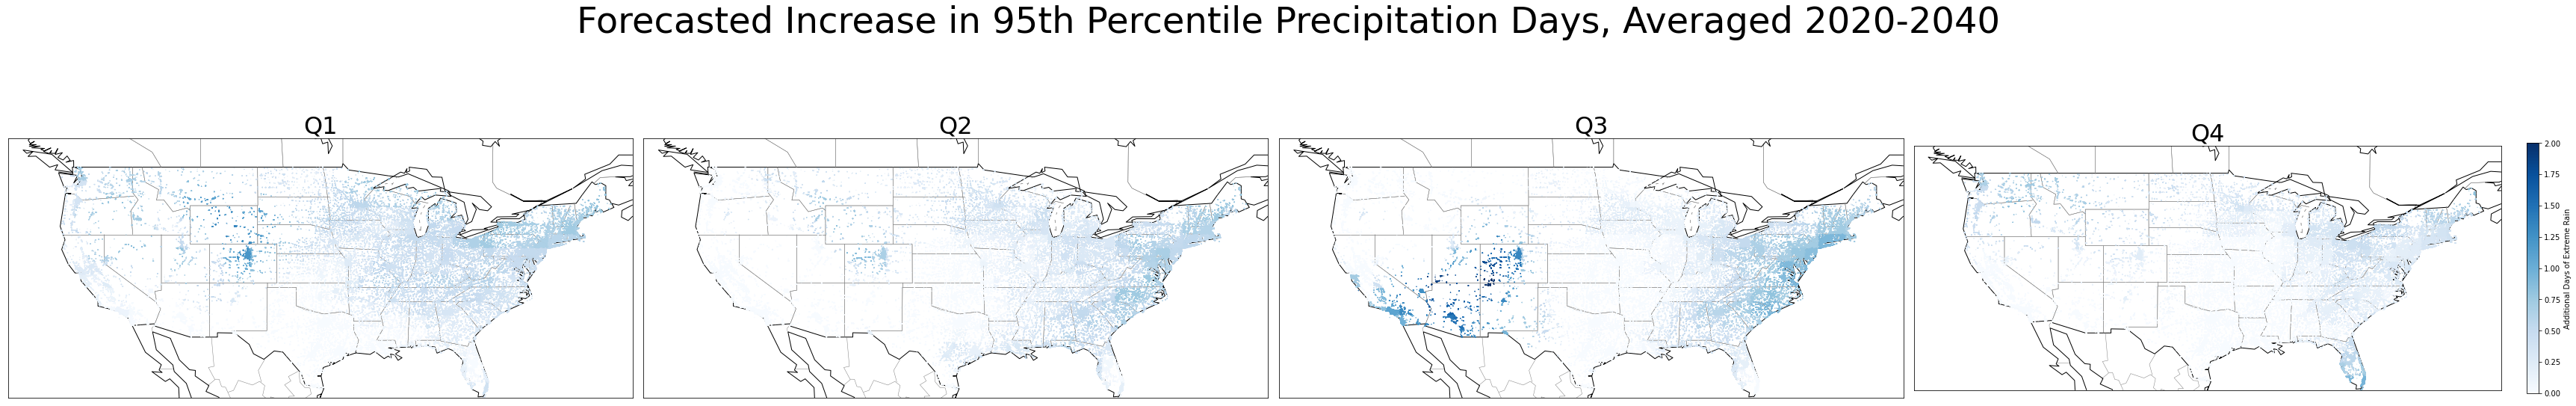

In [222]:
fig = plt.figure(figsize = (48, 32))
vmin = 0
vmax = 2



######################
# q1
ax = fig.add_subplot(141)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q1']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.prChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Blues',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees) # 
          # cmap="RdBu",)
plt.title("Q1", fontsize = 32)


######################
# q2
ax = fig.add_subplot(142)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q2']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.prChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Blues',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q2", fontsize = 32)


######################
# q3
ax = fig.add_subplot(143)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q3']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.prChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Blues',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q3", fontsize = 32)


######################
# q4
ax = fig.add_subplot(144)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q4']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.prChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Blues',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q4", fontsize = 32)
plt.colorbar(label="Additional Days of Extreme Rain", fraction=0.02, pad=0.04)
fig.tight_layout()

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=-.2)
fig.suptitle('Forecasted Increase in 95th Percentile Precipitation Days, Averaged 2020-2040', fontsize = 48)
fig.subplots_adjust(top=1.65)


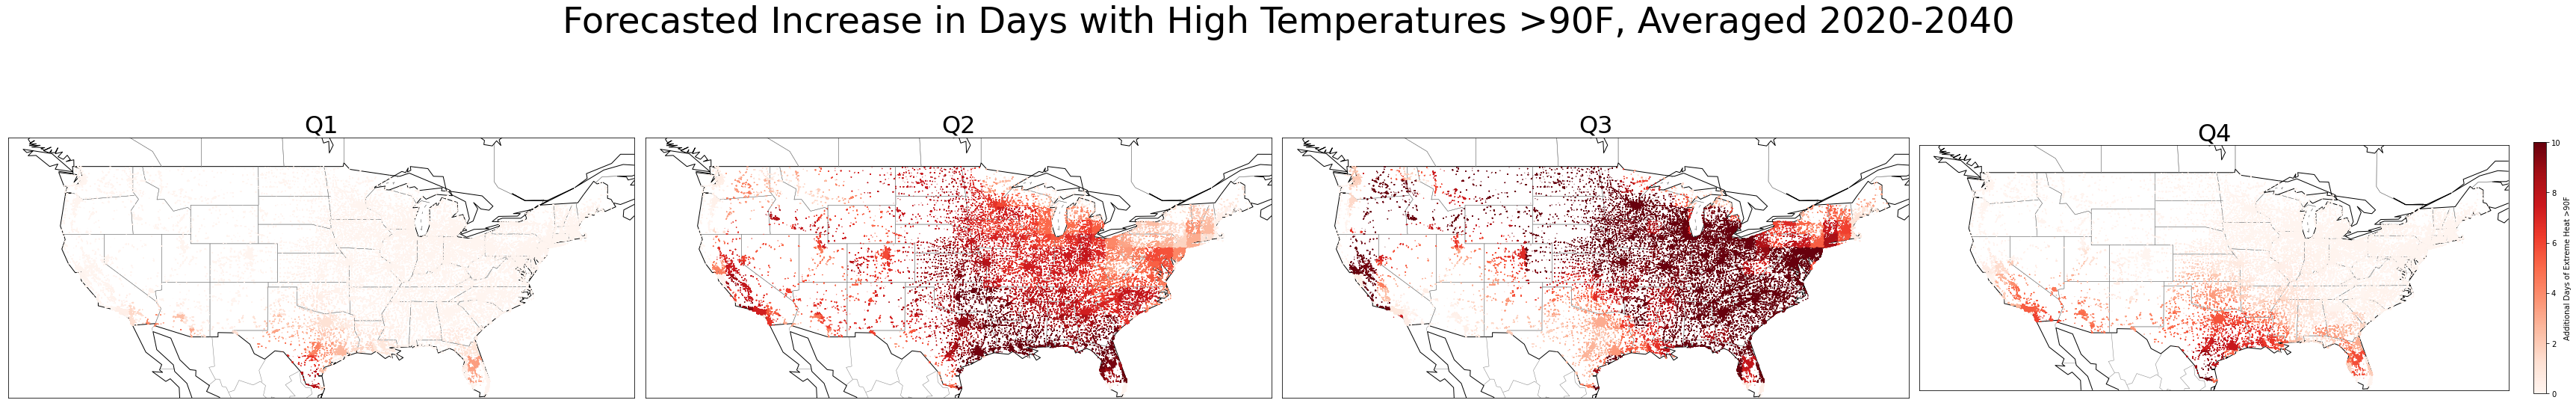

In [225]:
fig = plt.figure(figsize = (48, 32))
vmin = 0
vmax = 10



######################
# q1
ax = fig.add_subplot(141)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q1']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.tasmax90FChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Reds',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees) # 
          # cmap="RdBu",)
plt.title("Q1", fontsize = 32)


######################
# q2
ax = fig.add_subplot(142)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q2']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.tasmax90FChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Reds',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q2", fontsize = 32)


######################
# q3
ax = fig.add_subplot(143)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q3']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.tasmax90FChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Reds',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q3", fontsize = 32)


######################
# q4
ax = fig.add_subplot(144)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q4']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.tasmax90FChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Reds',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q4", fontsize = 32)
plt.colorbar(label="Additional Days of Extreme Heat >90F", fraction=0.02, pad=0.04)
fig.tight_layout()


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=-.2)
fig.suptitle('Forecasted Increase in Days with High Temperatures >90F, Averaged 2020-2040', fontsize = 48)
fig.subplots_adjust(top=1.65)


In [167]:
locDataWithWeather.head()

parent_number  latitude  longitude  zipcode  locationFracOfEmployees  \
0        435388  44.92883  -93.12358  55102.0                      1.0   
1        435388  44.92883  -93.12358  55102.0                      1.0   
2        435388  44.92883  -93.12358  55102.0                      1.0   
3        435388  44.92883  -93.12358  55102.0                      1.0   
4       6958797  44.91445  -93.14212  55102.0                      1.0   

  quarter  prChange  tasmax90FChange  
0      q1  0.553333         0.000000  
1      q2  0.413333         5.954185  
2      q3  0.064762        10.653484  
3      q4  0.260952         0.000000  
4      q1  0.553333         0.000000

# Find Own and Supplier Changes

In [86]:
locDataWithWeather = pd.read_csv("../../data/companyData/locDataWithWeatherPreds.csv").\
    drop(columns = ['Unnamed: 0','latitude','longitude'])


In [87]:
locDataWithWeather = locDataWithWeather.groupby(['parent_number',# 'latitude','longitude',
                            'zipcode','locationFracOfEmployees','quarter']).mean().reset_index()

In [88]:
locDataWithWeather.head()

parent_number  zipcode  locationFracOfEmployees quarter  prChange  \
0           7609  33407.0                 1.000000      q1  0.199048   
1           7609  33407.0                 1.000000      q2 -0.017143   
2           7609  33407.0                 1.000000      q3 -0.186667   
3           7609  33407.0                 1.000000      q4  0.708571   
4           9852   7058.0                 0.491803      q1  0.663810   

   tasmax90FChange  
0         0.051228  
1        11.264511  
2        18.414386  
3         1.948772  
4         0.000000

In [89]:
locDataWithWeather.shape

(891252, 6)

In [90]:
locDataWithWeather.head()

parent_number  zipcode  locationFracOfEmployees quarter  prChange  \
0           7609  33407.0                 1.000000      q1  0.199048   
1           7609  33407.0                 1.000000      q2 -0.017143   
2           7609  33407.0                 1.000000      q3 -0.186667   
3           7609  33407.0                 1.000000      q4  0.708571   
4           9852   7058.0                 0.491803      q1  0.663810   

   tasmax90FChange  
0         0.051228  
1        11.264511  
2        18.414386  
3         1.948772  
4         0.000000

In [91]:
locDataWithWeather.tasmax90FChange.describe()

count    891252.000000
mean          3.826044
std           4.330883
min          -0.001053
25%           0.000952
50%           1.678145
75%           7.275689
max          24.483308
Name: tasmax90FChange, dtype: float64

In [92]:
tempData = pd.pivot(locDataWithWeather.drop(columns = 'prChange'),index = ['parent_number',
                                     'zipcode','locationFracOfEmployees'],
        columns = 'quarter',
        values = 'tasmax90FChange').reset_index()

tempData['q1_temp'] = tempData.q1 + tempData.q4
tempData['q2_temp'] = tempData.q2 + tempData.q1
tempData['q3_temp'] = tempData.q3 + tempData.q2
tempData['q4_temp'] = tempData.q4 + tempData.q3

tempData.drop(columns = ['q1','q2','q3','q4'], inplace = True)

tempData.rename(columns = {'q1_temp': 'q1', 
                          'q2_temp': 'q2',
                          'q3_temp': 'q3',
                          'q4_temp': 'q4'}, 
               inplace = True)

'''pd.melt(tempData,
        id_vars = ,
        value_vars = ['q1_temp','q2_temp','q3_temp','q4_temp'],)'''

tempData = pd.melt(tempData,id_vars = ['parent_number',
                                     'zipcode','locationFracOfEmployees'],
       value_vars = ['q1','q2','q3','q4'],
       var_name = 'quarter',
       value_name    = 'tasmax90FChange')

tempData.head()

parent_number  zipcode  locationFracOfEmployees quarter  tasmax90FChange
0           7609  33407.0                 1.000000      q1         2.000000
1           9852   7058.0                 0.491803      q1         0.000000
2           9852  47904.0                 0.491803      q1         0.164812
3          12559  30523.0                 1.000000      q1         0.092882
4          15578   6606.0                 0.621118      q1         0.000952

In [93]:
tempData.tasmax90FChange.describe()

count    891252.000000
mean          7.652089
std           6.226035
min          -0.001053
25%           1.648421
50%           7.102707
75%          11.508772
max          33.960301
Name: tasmax90FChange, dtype: float64

In [94]:
precipData = pd.pivot(locDataWithWeather.drop(columns = 'tasmax90FChange'),index = ['parent_number',
                                     'zipcode','locationFracOfEmployees'],
        columns = 'quarter',
        values = 'prChange').reset_index()

precipData['q1_temp'] = precipData.q1 + precipData.q4
precipData['q2_temp'] = precipData.q2 + precipData.q1
precipData['q3_temp'] = precipData.q3 + precipData.q2
precipData['q4_temp'] = precipData.q4 + precipData.q3

precipData.drop(columns = ['q1','q2','q3','q4'], inplace = True)

precipData.rename(columns = {'q1_temp': 'q1', 
                          'q2_temp': 'q2',
                          'q3_temp': 'q3',
                          'q4_temp': 'q4'}, 
               inplace = True)

'''pd.melt(tempData,
        id_vars = ,
        value_vars = ['q1_temp','q2_temp','q3_temp','q4_temp'],)'''

precipData = pd.melt(precipData,id_vars = ['parent_number',
                                     'zipcode','locationFracOfEmployees'],
       value_vars = ['q1','q2','q3','q4'],
       var_name = 'quarter',
       value_name    = 'prChange')

In [95]:
locDataWithWeather = tempData.merge(precipData)

In [97]:
locDataWithWeather.tasmax90FChange.describe()

count    891252.000000
mean          7.652089
std           6.226035
min          -0.001053
25%           1.648421
50%           7.102707
75%          11.508772
max          33.960301
Name: tasmax90FChange, dtype: float64

In [98]:
# locDataWithWeather = pd.read_csv("../../data/companyData/locDataWithWeatherPreds.csv").drop(columns = 'Unnamed: 0')


locDataWithWeather_byFirm = locDataWithWeather.copy() #

locDataWithWeather_byFirm.prChange     = locDataWithWeather_byFirm.prChange     * locDataWithWeather_byFirm.locationFracOfEmployees
locDataWithWeather_byFirm.tasmax90FChange = locDataWithWeather_byFirm.tasmax90FChange * locDataWithWeather_byFirm.locationFracOfEmployees

# locDataWithWeather_byFirm.drop(columns = {'locationFracOfEmployees'}, inplace = True)
locDataWithWeather_byFirm.head()


parent_number  zipcode  locationFracOfEmployees quarter  tasmax90FChange  \
0           7609  33407.0                 1.000000      q1         2.000000   
1           9852   7058.0                 0.491803      q1         0.000000   
2           9852  47904.0                 0.491803      q1         0.081055   
3          12559  30523.0                 1.000000      q1         0.092882   
4          15578   6606.0                 0.621118      q1         0.000592   

   prChange  
0  0.907619  
1  0.440281  
2  0.298829  
3  0.500952  
4  0.554865

In [105]:
weatherPreds_byFirm = locDataWithWeather_byFirm.groupby(['quarter','parent_number']).sum().reset_index()

weatherPreds_byFirm.tasmax90FChange = weatherPreds_byFirm.tasmax90FChange/weatherPreds_byFirm.locationFracOfEmployees
weatherPreds_byFirm.prChange        = weatherPreds_byFirm.prChange/weatherPreds_byFirm.locationFracOfEmployees



# weatherPreds_byFirm.prChange = weatherPreds_byFirm.prChange - 4.5
weatherPreds_byFirm.head()

quarter  parent_number  zipcode  locationFracOfEmployees  tasmax90FChange  \
0      q1           7609  33407.0                 1.000000         2.000000   
1      q1           9852  54962.0                 0.983607         0.082406   
2      q1          12559  30523.0                 1.000000         0.092882   
3      q1          15578  13212.0                 1.538549         0.000952   
4      q1          21311  53007.0                 0.718686        -0.000100   

   prChange  
0  0.907619  
1  0.751429  
2  0.500952  
3  0.893333  
4  0.578095

In [106]:
weatherPreds_byFirm.locationFracOfEmployees.describe()

count    333844.000000
mean          1.092597
std           0.458045
min           0.100020
25%           0.907692
50%           1.000000
75%           1.250000
max           2.000000
Name: locationFracOfEmployees, dtype: float64

In [107]:
weatherPreds_byFirm.tasmax90FChange.describe()

count    333844.000000
mean          7.537684
std           5.970055
min          -0.000933
25%           1.920393
50%           7.003208
75%          11.315739
max          33.960301
Name: tasmax90FChange, dtype: float64

In [108]:
weatherPreds_byFirm.prChange.describe()

count    333844.000000
mean          0.589070
std           0.532739
min          -1.435238
25%           0.224078
50%           0.656597
75%           0.977143
max           2.447619
Name: prChange, dtype: float64

In [109]:
weatherPreds_byFirm.rename(columns = {'parent_number': 'abi'},inplace = True)
weatherPreds_byFirm.drop(columns= {'zipcode'}, inplace = True)

In [110]:
linkingTable = pd.read_csv('../../data/companyData/sc_linkingTable.csv').drop(columns = {'Unnamed: 0',
                                                                                        'cstatCompanies',
                                                                                        'igCompanies'})
linkingTable.head()

gvkey        abi
0   1562    4378204
1   2484  849416722
2   4274    9546995
3  14835    2406528
4  26520  479790834

In [111]:
weatherPreds_byFirm = weatherPreds_byFirm.merge(linkingTable)

In [112]:
weatherPreds_byFirm.head()

quarter     abi  locationFracOfEmployees  tasmax90FChange  prChange  gvkey
0      q1    7609                 1.000000         2.000000  0.907619   9799
1      q2    7609                 1.000000        11.315739  0.181905   9799
2      q3    7609                 1.000000        29.678897 -0.203810   9799
3      q4    7609                 1.000000        20.363158  0.521905   9799
4      q1  100537                 1.218738         0.104833  0.455815   3937

In [113]:
weatherPreds_byFirm

quarter        abi  locationFracOfEmployees  tasmax90FChange  prChange  \
0          q1       7609                 1.000000         2.000000  0.907619   
1          q2       7609                 1.000000        11.315739  0.181905   
2          q3       7609                 1.000000        29.678897 -0.203810   
3          q4       7609                 1.000000        20.363158  0.521905   
4          q1     100537                 1.218738         0.104833  0.455815   
...       ...        ...                      ...              ...       ...   
18483      q4  998861421                 1.000000         0.451128  0.711429   
18484      q1  998971592                 0.943396         0.000952  0.893333   
18485      q2  998971592                 0.943396         2.932180  1.114286   
18486      q3  998971592                 0.943396        11.507970  1.455238   
18487      q4  998971592                 0.943396         8.576742  1.234286   

        gvkey  
0        9799  
1        9799  
2        9799  
3        9799  
4        3937  
...       ...  
18483   21017  
18484  124595  
18485  124595  
18486  124595  
18487  124595  

[18488 rows x 6 columns]

## Direct Effects

In [114]:
weatherPreds_byFirm.head()

quarter     abi  locationFracOfEmployees  tasmax90FChange  prChange  gvkey
0      q1    7609                 1.000000         2.000000  0.907619   9799
1      q2    7609                 1.000000        11.315739  0.181905   9799
2      q3    7609                 1.000000        29.678897 -0.203810   9799
3      q4    7609                 1.000000        20.363158  0.521905   9799
4      q1  100537                 1.218738         0.104833  0.455815   3937

In [115]:
sum(weatherPreds_byFirm.gvkey.isin(goodsData.gvkey))

6888

In [116]:
weatherPreds_byFirm['gvkey'] = weatherPreds_byFirm['gvkey'].astype('int64')

In [117]:
goodsData = pd.read_csv("../../data/companyData/goodsData_0320.csv")[['gvkey']].drop_duplicates()
# goodsData['gvkey'] = goodsData['gvkey'].astype('object')
goodsData = goodsData.merge(weatherPreds_byFirm)

goodsData.gvkey

0       160635
1       160635
2       160635
3       160635
4        65158
         ...  
6883     35077
6884     19104
6885     19104
6886     19104
6887     19104
Name: gvkey, Length: 6888, dtype: int64

In [118]:
goodsData.head()

gvkey quarter        abi  locationFracOfEmployees  tasmax90FChange  \
0  160635      q1  530472216                 2.000000         4.362708   
1  160635      q2  530472216                 2.000000         6.374569   
2  160635      q3  530472216                 2.000000         7.719206   
3  160635      q4  530472216                 2.000000         5.707345   
4   65158      q1  957733751                 1.847222         1.380559   

   prChange  
0  0.132808  
1 -0.402955  
2  0.450330  
3  0.986092  
4  0.094830

## Indirect Effects

In [77]:
allSuppliers = pd.read_csv("../../data/companyData/allSupplierCustomerData.csv").\
    drop(columns = {'Unnamed: 0'}).rename(columns = {'supplier_zipcode': 'zipcode',
                                                    'customer_gvkey': 'gvkey'})\
    [['gvkey']].drop_duplicates().merge(weatherPreds_byFirm)
allSuppliers.head()

gvkey quarter        abi  locationFracOfEmployees  tasmax90FChange  \
0  61718.0      q1  712379885                 1.000000         0.065664   
1  61718.0      q2  712379885                 1.000000         0.071629   
2  61718.0      q3  712379885                 1.000000         0.457093   
3  61718.0      q4  712379885                 1.000000         0.451128   
4  61718.0      q1  891493322                 1.972632         1.088608   

   prChange  
0  0.172381  
1 -0.232381  
2  0.306667  
3  0.711429  
4  1.234998

In [78]:
worstSuppliers = allSuppliers# .groupby(['year','gvkey','qtr']).median().reset_index()

print(worstSuppliers.shape,allSuppliers.shape)

worstSuppliers.head()

(3960, 6) (3960, 6)


gvkey quarter        abi  locationFracOfEmployees  tasmax90FChange  \
0  61718.0      q1  712379885                 1.000000         0.065664   
1  61718.0      q2  712379885                 1.000000         0.071629   
2  61718.0      q3  712379885                 1.000000         0.457093   
3  61718.0      q4  712379885                 1.000000         0.451128   
4  61718.0      q1  891493322                 1.972632         1.088608   

   prChange  
0  0.172381  
1 -0.232381  
2  0.306667  
3  0.711429  
4  1.234998

Now find some summary statistics here.

In [79]:
indirEffects = worstSuppliers[['gvkey','prChange','tasmax90FChange']]
indirEffects.prChange = indirEffects.prChange*1.1
indirEffects.tasmax90FChange = indirEffects.tasmax90FChange*.454


dirEffects   = goodsData[['gvkey','prChange','tasmax90FChange']]
dirEffects.prChange = dirEffects.prChange*1.95
dirEffects.tasmax90FChange = dirEffects.tasmax90FChange*.869
dirEffects

gvkey  prChange  tasmax90FChange
0     160635  0.517950         7.582386
1     160635 -1.571523        11.079000
2     160635  1.756287        13.415979
3     160635  3.845760         9.919365
4      65158  0.341585         2.216122
...      ...       ...              ...
6883   35077  3.767829         8.086663
6884   19104  0.472589         1.920609
6885   19104  0.643363         3.028311
6886   19104  0.201888         5.021312
6887   19104  0.031115         3.913610

[6888 rows x 3 columns]

In [80]:
dirEffects.to_csv("../../data/companyData/dirEffectsWithWeatherPreds.csv")
indirEffects.to_csv("../../data/companyData/indirEffectsWithWeatherPreds.csv")

In [4]:
dirEffects   = pd.read_csv("../../data/companyData/dirEffectsWithWeatherPreds.csv")
indirEffects = pd.read_csv("../../data/companyData/indirEffectsWithWeatherPreds.csv")

In [81]:
print(dirEffects[['tasmax90FChange']].describe()/.869)

print(dirEffects[['prChange']].describe()/1.95)

       tasmax90FChange
count      7926.352129
mean          7.797321
std           7.322938
min          -0.000151
25%           1.678145
50%           6.425298
75%          11.522186
max          62.017678
          prChange
count  3532.307692
mean      0.617420
std       0.710089
min      -1.956190
25%       0.115134
50%       0.538584
75%       1.049210
max       4.020952


In [82]:
dirEffects[['prChange','tasmax90FChange']].describe()

prChange  tasmax90FChange
count  6888.000000      6888.000000
mean      1.203969         6.775872
std       1.384673         6.363633
min      -3.814571        -0.000131
25%       0.224511         1.458308
50%       1.050239         5.583584
75%       2.045960        10.012779
max       7.840857        53.893362

In [83]:
print(indirEffects[['tasmax90FChange']].describe()/.454)

print(indirEffects[['prChange']].describe()/1.1)

       tasmax90FChange
count      8722.466960
mean          6.848606
std           6.867933
min          -0.000151
25%           1.382101
50%           5.234486
75%          10.231839
max          50.264917
          prChange
count  3600.000000
mean      0.572704
std       0.643682
min      -1.883739
25%       0.127010
50%       0.465436
75%       0.940187
max       3.144587


In [84]:
indirEffects[['prChange','tasmax90FChange']].describe()

prChange  tasmax90FChange
count  3960.000000      3960.000000
mean      0.629974         3.109267
std       0.708050         3.118042
min      -2.072113        -0.000069
25%       0.139711         0.627474
50%       0.511979         2.376457
75%       1.034206         4.645255
max       3.459046        22.820272

In [11]:
effectsAll[['prChange','tasmax90FChange']].describe()

prChange  tasmax90FChange
count  3960.000000      3960.000000
mean      1.147564         5.579940
std       1.328972         6.137448
min      -3.082751        -0.000661
25%       0.319980         0.376518
50%       1.035054         3.687528
75%       1.927687         9.110020
max       6.428135        46.040063

In [85]:
effectsAll = dirEffects + indirEffects
variables    = ['Extreme Heat','Extreme Rain','Extreme Heat','Extreme Rain']
allEffects = pd.DataFrame()
allEffects['variables']  = variables
allEffects['effectSize'] = effectsAll
allEffects['dirIndir']   = ['dir','dir','indir','indir']
# allEffects['variables'] = variables
allEffects.head()

ValueError: Wrong number of items passed 3, placement implies 1

------------------------------

# Code Graveyard




In [97]:
weather = 'pr'
scenario = 'ssp585'

file1 = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn_20150101-20241231.nc'
file2 = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn_20250101-20341231.nc'
file3 = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn_20350101-20441231.nc'

data1 = xr.open_mfdataset(file1,concat_dim=['ensemble'],combine='nested',decode_times=True)
data2 = xr.open_mfdataset(file2,concat_dim=['ensemble'],combine='nested',decode_times=True)
data3 = xr.open_mfdataset(file3,concat_dim=['ensemble'],combine='nested',decode_times=True)

data = xr.combine_by_coords([data1,data2,data3])

In [23]:
prExtremes_q1 = (1*(prFuture.where(prFuture.time.dt.quarter == 1, drop = True).pr - 
     pr95s.where(pr95s.quarter == 1, drop = True)) > 0)

prQ1Avg = prExtremes_q1.groupby(prExtremes_q1.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)


### q2 
'''prExtremes_q2 = (1*(prFuture.where(prFuture.time.dt.quarter == 2, drop = True).pr - 
     pr95s.where(pr95s.quarter == 2, drop = True)) > 0)

prQ2Avg = prExtremes_q2.groupby(prExtremes_q2.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)



### q3 
prExtremes_q3 = (1*(prFuture.where(prFuture.time.dt.quarter == 3, drop = True).pr - 
     pr95s.where(pr95s.quarter == 3, drop = True)) > 0)

prQ3Avg = prExtremes_q3.groupby(prExtremes_q3.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)



### q4
prExtremes_q4 = (1*(prFuture.where(prFuture.time.dt.quarter == 4, drop = True).pr - 
     pr95s.where(pr95s.quarter == 4, drop = True)) > 0)

prQ4Avg = prExtremes_q4.groupby(prExtremes_q4.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)
'''

prQ1Avg

<xarray.DataArray 'pr' (lat: 25, lon: 64)>
array([[4.2847619 , 4.16285714, 4.26380952, ..., 4.66761905, 4.68761905,
        4.66761905],
       [4.29428571, 4.20095238, 4.22761905, ..., 4.99047619, 4.93238095,
        4.77619048],
       [4.3       , 4.23047619, 4.29428571, ..., 4.91238095, 4.9152381 ,
        4.94571429],
       ...,
       [5.1647619 , 5.12      , 5.17238095, ..., 5.20952381, 5.11333333,
        5.14380952],
       [5.12952381, 5.09238095, 5.05809524, ..., 5.33238095, 5.26571429,
        5.1047619 ],
       [5.14190476, 5.11428571, 5.07142857, ..., 5.37238095, 5.2       ,
        5.19714286]])
Coordinates:
  * lat      (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
  * lon      (lon) float64 -157.5 -156.1 -154.7 -153.3 ... -71.72 -70.31 -68.91

In [ ]:
file = open('../../data/companyData/miroc_historical95s.pkl','rb')
percentileByEnsemble = pkl.load(file)

In [ ]:
percentileByEnsemble

In [ ]:
# numpy and xarray and all that
# https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

In [ ]:
data.ensemble == 1

In [ ]:
# https://metview.readthedocs.io/en/latest/examples/ens_mean_spread_xarray.html
# data.mean(dim = 'ensemble')
overall = data.mean(dim = ['lat','lon'])
overall.pr.plot(hue = 'ensemble')

In [ ]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (13, 5)
ens.tas.plot(hue="realization")
plt.show()

In [ ]:
# this takes the ensemble mean and then the mean over time
data_emean = data.mean()# .mean() 
print(data_emean)

In [ ]:
import glob

import xarray as xr

import xclim as xc

# Set display to HTML sytle (for fancy output)
xr.set_options(display_style="html", display_width=50)

import matplotlib.pyplot as plt

%matplotlib inline

from xclim import ensembles

In [ ]:
len(glob.glob('../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r1*i1p1f1_gn_19800101-19891231.nc'))
datasets = glob.glob('../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r1*i1p1f1_gn_19800101-19891231.nc')
datasets

In [ ]:
# file = 
# data = xr.open_mfdataset(file,concat_dim='ensemble',combine='nested',decode_times=True)

ens = ensembles.create_ensemble(datasets, mf_flag = True)

In [ ]:
geoHQ = gpd.GeoDataFrame(
    allIG,
    geometry=gpd.points_from_xy(
        allIG["longitude"],
        allIG["latitude"],
    ),
    crs={"init":"EPSG:4326"},
)

In [ ]:
one_point = data["pr"].sel(lat=50, lon=50)

In [ ]:
pd.DataFrame(test.temperature[test.year == 2010]).plot()

Now go through and make this iterable for the entire list.

In [ ]:
i = 0
data.pr.sel(allIG.iloc[0,:], method='nearest')

In [ ]:
hqPost2010 = geoHQ[geoHQ.archive_version_year > 2010].reset_index()

In [ ]:
start = time.time()



tempsList = list()
for i in range(0,hqPost2010.shape[0]):
    nearbyTemps = temps.sel(hqPost2010.loc[i,['latitude','longitude']], method='nearest')
    
    tempsList.append(list(np.array(nearbyTemps.temperature[nearbyTemps.year == hqPost2010.archive_version_year[i]])))

    if (i%100 == 0):
        print(i)
    
print(time.time() - start)






In [ ]:
outfile =  'data/hqDailyTemperatures.pkl'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(tempsList, pickle_file)

# Now let's do the percentiles

In [ ]:
baselineName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/mirocHQs_198199.csv'
baseline = pd.read_csv(baselineName)

In [ ]:
baseline.s.unique()

In [ ]:
baseline[baseline.variable == 'tasmax_hist']

In [ ]:
quantsPrecip   = baseline[baseline.variable == 'pr_hist'][['zipcode','variable','quarter','value']].\
    groupby(['zipcode','variable','quarter']).quantile(.95).reset_index()
quantsPrecip.rename(columns = {'value': 'quantCutoff'}, inplace = True)
quantsPrecip['daysExtreme'] = 4.5


In [ ]:
quantsPrecip.head()

Find number of days above 90F.

In [ ]:
temp = baseline[baseline.variable == 'tasmax_hist'].drop(columns = {'s','year'})
temp.head()

In [ ]:
quantsTemp = baseline[baseline.variable == 'tasmax_hist'].drop(columns = {'s','year'})
quantsTemp['daysExtreme'] = 1*(quantsTemp.value > 305.3)
quantsTemp = quantsTemp.groupby(['zipcode', 'variable', 'quarter']).median().reset_index()
quantsTemp.rename(columns = {'value': 'quantCutoff'}, inplace = True)

quantsTemp.daysExtreme = quantsTemp.daysExtreme*90
quantsTemp.quantCutoff = 305.3


quantsTemp.head()

In [ ]:
quantsPrecip.head()

In [ ]:
quants = quantsPrecip.append(quantsTemp)

In [ ]:
quants.head()

And apply them to the next period.

In [ ]:
nextPeriodName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/mirocHQs_202040.csv'
nextPeriod = pd.read_csv(nextPeriodName)# .drop(columns = ['s'])

In [ ]:
nextPeriod.shape[0]/len(nextPeriod.zipcode.unique())/365/18/2/4

In [ ]:
nextPeriod.head()

In [ ]:
quants.daysExtreme

In [ ]:
nextPeriod = nextPeriod.merge(quants)
nextPeriod.head()

In [ ]:
nextPeriod['extreme'] = 1*(nextPeriod.value > nextPeriod.quantCutoff)

In [ ]:
# nextPeriod.to_csv("../../data/companyData/nextPeriodExtremes.csv")

In [ ]:
nextPeriod.head()

In [ ]:
nextPeriod.year

In [ ]:
nextPeriod['yearQuarter'] = nextPeriod.year.astype('int64') + nextPeriod.quarter.str[1:2].astype('int64')/4

In [ ]:
nextPeriod.head()

In [ ]:
nextPeriod[['zipcode']].drop_duplicates().shape

In [ ]:
nextPeriod.head()

In [ ]:
nextPeriod[nextPeriod.variable == 'pr_hist'].extreme.describe()

In [ ]:
quarterlyExtremes = nextPeriod[['variable','s','year','quarter','yearQuarter','zipcode','extreme']].\
    groupby(['variable','s','year','quarter','yearQuarter','zipcode']).sum().reset_index()

In [ ]:
zipLats = pd.read_csv("../../data/companyData/quarterlyExtremesMean.csv")[['zipcode','latitude','longitude']].\
    groupby(['zipcode']).mean().reset_index()

quarterlyExtremes = quarterlyExtremes.merge(zipLats)

In [ ]:
quarterlyExtremes.head()

In [ ]:
quarterlyExtremes.head()

In [ ]:
quarterlyExtremes.to_csv("../../data/companyData/quarterlyExtremesAll.csv")

In [ ]:
quarterlyExtremesMean = quarterlyExtremes[['variable','quarter','zipcode','latitude','longitude','extreme']].\
    groupby(['variable','quarter','zipcode','latitude','longitude']).mean().reset_index()

In [ ]:
quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].extreme.describe()

In [ ]:
quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme.describe()

In [ ]:
quarterlyExtremesMean.head()

In [ ]:
quarterlyExtremesMean = quarterlyExtremesMean.merge(quants[['zipcode','variable','quarter','daysExtreme']])
quarterlyExtremesMean.head()

In [ ]:
quarterlyExtremesMean.to_csv("../../data/companyData/quarterlyExtremesMean.csv")

In [ ]:
zipLats.head()

In [ ]:
quarterlyExtremesMean.groupby(['variable']).extreme.describe()

------------------------------

In [ ]:
# we might have multiple records from within the same zipcode
quarterlyExtremesMean = quarterlyExtremes[['variable','quarter','zipcode','extreme']].\
    groupby(['variable','quarter','zipcode']).mean().reset_index()

# .groupby(['variable','quarter','zipcode']).mean().reset_index()


In [ ]:
quarterlyExtremesMean.groupby('variable').extreme.hist(bins = 100)

In [ ]:
(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].extreme - 4.5).hist(bins = 100)

In [ ]:
(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme - 4.5).hist(bins = 100)

In [ ]:
sum(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme > 4.5)/quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].shape[0]

In [ ]:
sum(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].\
    extreme > 4.5)/quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].shape[0]